## Baseline Model 


In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from PIL import Image
from keras.applications import vgg16
from keras.models import Model
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
# get the array with the class names from the folder 
# read foldernames
import os
import glob
import cv2

KeyboardInterrupt: 

In [2]:
files = [r'clothing-dataset-small\train\dress\009b3c31-fb62-45c0-be9a-37a5c238cb88.jpg',
 r'clothing-dataset-small\train\dress\041c6bde-e737-46fd-9586-984c1503941f.jpg',
 r'clothing-dataset-small\train\dress\04f0b07f-4b9f-4c55-bc5d-b693658fb32c.jpg',
 r'clothing-dataset-small\train\dress\053689bb-5928-489b-aeaf-dfb969b05e93.jpg',
 r'clothing-dataset-small\train\dress\0546d34a-a369-4723-8d3a-74c0f51af26c.jpg',
 r'clothing-dataset-small\train\dress\05d361f6-9518-4bf7-a644-6dba9402adf4.jpg',
 r'clothing-dataset-small\train\dress\07bf93d6-850f-4309-ba86-52e2d1f5cce2.jpg',
 r'clothing-dataset-small\train\dress\08868e1e-e19a-43de-b883-82694af5a482.jpg',
 r'clothing-dataset-small\train\dress\08e1576e-1a7c-4a80-813d-f6914b010a8a.jpg',
 r'clothing-dataset-small\train\dress\09c09dd1-ccef-4ced-96dd-ba3b828a49b4.jpg',
 r'clothing-dataset-small\train\dress\0a69db60-c052-4b9a-a90d-e53120d091d5.jpg',
 r'clothing-dataset-small\train\dress\0b5f7f85-fa44-4406-91ed-6b730e4b6fa1.jpg',
 r'clothing-dataset-small\train\dress\0ba71e2a-4941-4c09-952e-e32895840d34.jpg',
 r'clothing-dataset-small\train\dress\0d3cf39f-78f1-440e-9504-f510e75aff0b.jpg',
 r'clothing-dataset-small\train\dress\0d639320-434a-469f-a9b7-d1f8e3b1f22a.jpg',
 r'clothing-dataset-small\train\dress\123cedc9-f0ee-432b-a087-7c4981e60c75.jpg',
 r'clothing-dataset-small\train\dress\13a7bfe9-bb57-41a2-867a-149e9d26c93a.jpg',
 r'clothing-dataset-small\train\dress\13e42594-f930-4cb3-b107-2df98d2feda8.jpg',
 r'clothing-dataset-small\train\dress\146d59ff-931a-4997-a699-d27c062135fc.jpg',
 r'clothing-dataset-small\train\dress\14a73972-d3a6-430e-8fe1-8e6911e40371.jpg',
 r'clothing-dataset-small\train\dress\15e1f140-7552-4402-9419-a6dd10cba223.jpg',
 r'clothing-dataset-small\train\dress\160c2e1c-48d5-4e31-8155-83152e2ad649.jpg',
 r'clothing-dataset-small\train\dress\16740066-3329-4165-884a-25c42814d590.jpg',
 r'clothing-dataset-small\train\dress\176e457c-bda2-4cc2-8044-af1a528bb9b1.jpg',
 r'clothing-dataset-small\train\dress\18519bfc-435f-4280-8779-f7fad8fe9e79.jpg',
 r'clothing-dataset-small\train\dress\1bb8d90d-2b00-4623-9bfe-2ffac4f7d17f.jpg',
 r'clothing-dataset-small\train\dress\1c22dfec-9633-4d10-88f5-b6cad5b27dfc.jpg',
 r'clothing-dataset-small\train\dress\1da10477-cb53-4506-b54c-1ad949002e35.jpg',
 r'clothing-dataset-small\train\dress\2074bc3b-b374-4fc6-b520-83dd51b98976.jpg',
 r'clothing-dataset-small\train\dress\20a31e9d-f1d8-4eaf-9edd-9b1a8b59799a.jpg',
 r'clothing-dataset-small\train\dress\21059bce-cf86-4064-b9af-5dbbbc6e7593.jpg',
 r'clothing-dataset-small\train\dress\2110c5ff-9b43-45e2-b9a0-316dd2fb26fe.jpg',
 r'clothing-dataset-small\train\dress\221f6226-4285-4d83-83ab-d3a1950e4a22.jpg',
 r'clothing-dataset-small\train\dress\22cc2840-9a64-4d9f-8dbe-00e81fa4b2c1.jpg',
 r'clothing-dataset-small\train\dress\230ee7f3-a206-4804-9c23-8b5bda052140.jpg',
 r'clothing-dataset-small\train\dress\2456b899-8146-4823-951a-efe3ab0c2a5b.jpg',
 r'clothing-dataset-small\train\dress\27de089d-8509-479e-9d23-7b78f93e2480.jpg',
 r'clothing-dataset-small\train\dress\281902e9-43a3-4848-b9c7-c92eeb8a40a8.jpg',
 r'clothing-dataset-small\train\dress\2a711e77-ef04-47ca-8b5c-f1729d0ce04e.jpg',
 r'clothing-dataset-small\train\dress\2adf987d-a985-4023-81d4-adf9368ca251.jpg',
 r'clothing-dataset-small\train\dress\2b66fdb1-33dd-445f-a422-b17fbe543483.jpg',
 r'clothing-dataset-small\train\dress\2bc3b252-bec7-4dbc-beb3-f7977e71000f.jpg',
 r'clothing-dataset-small\train\dress\2fdb7ce2-a2f1-4d1d-9e8f-345c28b5b25d.jpg',
 r'clothing-dataset-small\train\dress\3175a932-43ce-46fd-8599-37f375b1f776.jpg',
 r'clothing-dataset-small\train\dress\3193786c-22f1-4ea9-9e84-8ee47c138a8d.jpg',
 r'clothing-dataset-small\train\dress\32c91193-3fe7-48a1-8867-01c55e4f3985.jpg',
 r'clothing-dataset-small\train\dress\334bc6ef-fc89-4226-90f3-dd63645ec845.jpg',
 r'clothing-dataset-small\train\dress\34118cd8-2498-4965-b7cf-3b50d1d45e22.jpg',
 r'clothing-dataset-small\train\dress\354f2a8e-8ecb-4284-9ab9-e39399e36afb.jpg',
 r'clothing-dataset-small\train\dress\35bea435-5e0c-4fe4-9890-2a58f37f4029.jpg',
 r'clothing-dataset-small\train\dress\37271dcc-d0e5-4f31-81ac-ad4b5974812e.jpg',
 r'clothing-dataset-small\train\dress\377c407c-b353-45c5-b592-e68bad2d68d2.jpg',
 r'clothing-dataset-small\train\dress\396bd268-2b09-4412-a3c7-323b57cbf610.jpg',
 r'clothing-dataset-small\train\dress\3b384197-7b19-464b-8bd7-823d4128ce74.jpg',
 r'clothing-dataset-small\train\dress\3bc76eb3-1fd9-4244-80f0-e9fcd982c64c.jpg',
 r'clothing-dataset-small\train\dress\3bdee391-66e0-4ea8-a2f2-8086a631c907.jpg',
 r'clothing-dataset-small\train\dress\3c4bedd6-1073-4d9d-bb06-031f865f0846.jpg',
 r'clothing-dataset-small\train\dress\3d12283a-fd39-4f2b-a8f9-da9f1d5bdae5.jpg',
 r'clothing-dataset-small\train\dress\3fc1c8b5-a541-4e74-9778-f1af27465f5e.jpg',
 r'clothing-dataset-small\train\dress\4068d0b4-56a5-4108-85c4-7c48c201147f.jpg',
 r'clothing-dataset-small\train\dress\411a9780-e825-4bed-b9ce-848927b36638.jpg',
 r'clothing-dataset-small\train\dress\4142d3bc-05b8-42f4-bd16-7bcd565cfd99.jpg',
 r'clothing-dataset-small\train\dress\415566a9-f64f-412f-9509-b72d8b8d6c65.jpg',
 r'clothing-dataset-small\train\dress\41e13fef-86f5-40cb-807f-84adde1ba3d2.jpg',
 r'clothing-dataset-small\train\dress\41f35a3f-4592-4e50-a3ae-67568ed52754.jpg',
 r'clothing-dataset-small\train\dress\4313db90-b7e8-4f73-b239-f70ad8e0bf7a.jpg',
 r'clothing-dataset-small\train\dress\4334620b-316c-4762-a116-9add429220d0.jpg',
 r'clothing-dataset-small\train\dress\4569133b-2f46-464d-8405-8f7b5fe1ff6a.jpg',
 r'clothing-dataset-small\train\dress\45bd7880-dbba-4264-a4fd-c1b575b7c5ee.jpg',
 r'clothing-dataset-small\train\dress\46ad36ad-8234-4fa1-a88b-e76256413c17.jpg',
 r'clothing-dataset-small\train\dress\46f62d95-a8f3-4b5c-8d2b-9e8f0d8983de.jpg',
 r'clothing-dataset-small\train\dress\47251c31-c77d-4186-b53e-080f042455cf.jpg',
 r'clothing-dataset-small\train\dress\47aaf80a-9b52-4716-9851-8d8cfb52f9aa.jpg',
 r'clothing-dataset-small\train\dress\484aaf4f-de3a-445b-8a3a-452e9e6af697.jpg',
 r'clothing-dataset-small\train\dress\4a999110-5b25-48d1-89eb-6d25c38d9db6.jpg',
 r'clothing-dataset-small\train\dress\4b72d5a8-4a05-4df9-ab95-2404cfff4c03.jpg',
 r'clothing-dataset-small\train\dress\4b8e5d41-3e12-4d2b-8634-e62e71d613ff.jpg',
 r'clothing-dataset-small\train\dress\4c1acd5c-80bc-4f85-adb4-404f553ca881.jpg',
 r'clothing-dataset-small\train\dress\4c60802b-fe0c-4cc8-a36e-0c6bde058bea.jpg',
 r'clothing-dataset-small\train\dress\4e788cda-1b2a-43dd-ad4f-8a275475ea88.jpg',
 r'clothing-dataset-small\train\dress\4eb4072c-8da5-4667-9cb2-e670ee65bc07.jpg',
 r'clothing-dataset-small\train\dress\4f531375-ea12-4f45-b5bc-f206088fbf5a.jpg',
 r'clothing-dataset-small\train\dress\51bdf9e1-6ff4-46fe-9051-2821fff88f85.jpg',
 r'clothing-dataset-small\train\dress\521c2c74-7131-427a-af36-0c48aa438119.jpg',
 r'clothing-dataset-small\train\dress\522cff43-13e2-4f16-a184-ce7616460e2e.jpg',
 r'clothing-dataset-small\train\dress\535730d9-abf0-428f-8f2f-b0c10591b657.jpg',
 r'clothing-dataset-small\train\dress\55694d05-4d0e-48cd-936a-3acd3761ceac.jpg',
 r'clothing-dataset-small\train\dress\58c792f7-57e0-4193-bd4e-6866fae890a0.jpg',
 r'clothing-dataset-small\train\dress\58caa9fd-a3df-44ac-b296-05dbd8d02d47.jpg',
 r'clothing-dataset-small\train\dress\5a8598c8-3756-4bb7-8e22-4bdefe86c18d.jpg',
 r'clothing-dataset-small\train\dress\5b0b2f96-d429-4dc8-a43b-33804236a351.jpg',
 r'clothing-dataset-small\train\dress\5cb8b297-de57-4ee2-984a-7c9cdc748558.jpg',
 r'clothing-dataset-small\train\dress\5e173b2c-a978-47d2-8a98-413d910e97e4.jpg',
 r'clothing-dataset-small\train\dress\5e982004-dc73-41b7-a784-ba316570fc1e.jpg',
 r'clothing-dataset-small\train\dress\618876ca-630c-4eb4-98ca-07c60124ef54.jpg',
 r'clothing-dataset-small\train\dress\6253ae47-c888-4991-a2dc-c484a98a7515.jpg',
 r'clothing-dataset-small\train\dress\66ba4337-6f37-455b-ad6d-08d09eac1baf.jpg',
 r'clothing-dataset-small\train\dress\69c6cb91-303a-4d42-be28-0a4e6666b39e.jpg',
 r'clothing-dataset-small\train\dress\6a42eb5f-1fe1-4ff8-9b1d-5cb40ed25469.jpg',
 r'clothing-dataset-small\train\dress\6b779a54-4cdc-4205-ba1f-9597c779a683.jpg',
 r'clothing-dataset-small\train\dress\6b801e31-9073-40dd-aa87-956ce6c02c7c.jpg',
 r'clothing-dataset-small\train\dress\6e143162-9472-43c3-8db1-04eeea838ae8.jpg',
 r'clothing-dataset-small\train\dress\6eaff8d0-517f-4fad-ad54-4249b8c53ff9.jpg',
 r'clothing-dataset-small\train\dress\6f5d2dc7-5c5c-4d53-85fc-76b64950fd10.jpg',
 r'clothing-dataset-small\train\dress\702c26ad-76d4-4906-a13f-62fc0af4b083.jpg',
 r'clothing-dataset-small\train\dress\716a287d-b701-4fe8-9a0b-ab67d7998b07.jpg',
 r'clothing-dataset-small\train\dress\72512c3a-98b8-46e9-bdd6-60ef4261f325.jpg',
 r'clothing-dataset-small\train\dress\725838e4-765b-4c66-a1bc-c1023468c076.jpg',
 r'clothing-dataset-small\train\dress\7405eabb-acec-426a-bfa3-a0533b1778e0.jpg',
 r'clothing-dataset-small\train\dress\762852a3-6f71-48c5-9b5b-e4818405fc3f.jpg',
 r'clothing-dataset-small\train\dress\763396ce-3b74-425b-9f0e-0ef2b20e10cc.jpg',
 r'clothing-dataset-small\train\dress\77ef94ed-122b-41a0-b5c8-35548b2c1328.jpg',
 r'clothing-dataset-small\train\dress\78ba342e-239f-4b19-81ed-e0266331f71c.jpg',
 r'clothing-dataset-small\train\dress\7a634f1b-53ef-4314-b4d0-829a4be0933c.jpg',
 r'clothing-dataset-small\train\dress\7a6ec21f-f2cd-4ede-a068-3a24e1e7ddd4.jpg',
 r'clothing-dataset-small\train\dress\7aa53761-7711-4850-b94e-9d8ae3272320.jpg',
 r'clothing-dataset-small\train\dress\7ac347b0-0147-4f0e-8174-c40177d53287.jpg',
 r'clothing-dataset-small\train\dress\7f9e3f88-a93a-42ba-acad-fc3b5bf69566.jpg',
 r'clothing-dataset-small\train\dress\7fc487f9-81a1-4285-aef9-45574cc8adce.jpg',
 r'clothing-dataset-small\train\dress\7fc78f14-68ad-4daa-ad8d-5e016016c680.jpg',
 r'clothing-dataset-small\train\dress\80915bfe-d4fe-407e-8105-e46169d5bc53.jpg',
 r'clothing-dataset-small\train\dress\824014f4-825b-4bf2-835e-e3b8b7d0f387.jpg',
 r'clothing-dataset-small\train\dress\82878359-5004-44b9-8a93-6234169793a4.jpg',
 r'clothing-dataset-small\train\dress\82b68a78-d10f-4e21-b869-73d7a4ddd095.jpg',
 r'clothing-dataset-small\train\dress\833cea61-c79a-4481-8082-8c0fe309c194.jpg',
 r'clothing-dataset-small\train\dress\860ce7db-2433-4a5a-81fb-2251c79abb04.jpg',
 r'clothing-dataset-small\train\dress\877eebfc-1de1-4009-8362-e289d2891dea.jpg',
 r'clothing-dataset-small\train\dress\8942b418-8e99-450c-a051-63c2f850937b.jpg',
 r'clothing-dataset-small\train\dress\8b366b95-1958-4b76-a9c3-f8195f589499.jpg',
 r'clothing-dataset-small\train\dress\8dcd8c2d-e44b-445b-b026-653d7e6918b8.jpg',
 r'clothing-dataset-small\train\dress\8e06cd75-f99a-4df0-a148-64cb36b4ba51.jpg',
 r'clothing-dataset-small\train\dress\8f630d7e-0df3-40f4-a40c-41f6386b68c9.jpg',
 r'clothing-dataset-small\train\dress\9253edb0-4880-48e4-a7c3-a3b40c837a3e.jpg',
 r'clothing-dataset-small\train\dress\935c68bd-b5d7-4d17-8e2c-0610b04aebf2.jpg',
 r'clothing-dataset-small\train\dress\95dd0618-9a05-4abe-853c-fa6c3fa9bcce.jpg',
 r'clothing-dataset-small\train\dress\968e1bb6-5441-4bb6-b56b-6b066dd2423e.jpg',
 r'clothing-dataset-small\train\dress\9764558f-a55d-4909-865a-b2967debafef.jpg',
 r'clothing-dataset-small\train\dress\97cddbc9-a59f-490e-a10d-7878b2aff826.jpg',
 r'clothing-dataset-small\train\dress\986d3a7e-d9e0-4c7b-a317-560797873433.jpg',
 r'clothing-dataset-small\train\dress\99f5d28d-765f-4b2f-8e83-1feba2166a6b.jpg',
 r'clothing-dataset-small\train\dress\9a5bb17d-2ab7-45dc-af8b-08ad0f42ba16.jpg',
 r'clothing-dataset-small\train\dress\9d92e0e2-f5ae-45da-9c03-e782de380e88.jpg',
 r'clothing-dataset-small\train\dress\9e3efd31-68df-4278-a592-acfc6bcaee82.jpg',
 r'clothing-dataset-small\train\dress\9e578f34-a6df-46f6-80b0-1dfd30b7fa36.jpg',
 r'clothing-dataset-small\train\dress\9fdf4d40-5e5c-445a-ada6-bd87925609ca.jpg',
 r'clothing-dataset-small\train\dress\a099199b-9ec3-4f63-a157-dbdb1757eae5.jpg',
 r'clothing-dataset-small\train\dress\a09d821a-cfa4-4dcb-b734-e45515b3ead0.jpg',
 r'clothing-dataset-small\train\dress\a0b2aa38-51d0-4219-a135-fa3d769f7d37.jpg',
 r'clothing-dataset-small\train\dress\a10eee1b-7361-44c4-9dd8-90e91e083573.jpg',
 r'clothing-dataset-small\train\dress\a1190e56-0e53-41e3-ad16-a63575173747.jpg',
 r'clothing-dataset-small\train\dress\a2e6fd5e-001b-4cbc-86a0-7f015a1beda6.jpg',
 r'clothing-dataset-small\train\dress\a5625e10-a1f1-4744-987e-851af2d11a00.jpg',
 r'clothing-dataset-small\train\dress\a5b5dd47-2e34-475e-99b0-6a977fb8786c.jpg',
 r'clothing-dataset-small\train\dress\a81e5ddc-184c-4e76-8492-de4b73839cc9.jpg',
 r'clothing-dataset-small\train\dress\aa38d686-aa76-4bfa-8d79-c6ca93cdabb9.jpg',
 r'clothing-dataset-small\train\dress\ac4e79c1-4bfd-4181-bdff-cd860af2c8d3.jpg',
 r'clothing-dataset-small\train\dress\ac6b4d26-7e1b-49a5-8045-84d213b56a7e.jpg',
 r'clothing-dataset-small\train\dress\ae6f7084-8025-4ac5-9326-1f5db4e61305.jpg',
 r'clothing-dataset-small\train\dress\b2279dec-874d-4571-a8b5-8e7d704e596d.jpg',
 r'clothing-dataset-small\train\dress\b3f43dc1-ea70-4bb0-b17c-39877c99b18f.jpg',
 r'clothing-dataset-small\train\dress\b47ca626-8848-43e5-9b9a-70217872523f.jpg',
 r'clothing-dataset-small\train\dress\b59e4d4a-a283-4868-8a81-2f24d8b9c8d8.jpg',
 r'clothing-dataset-small\train\dress\b6111cee-12de-4c9f-8a84-200313eb8a1d.jpg',
 r'clothing-dataset-small\train\dress\b769e3fb-d74b-4695-9d86-afcc5f533f75.jpg',
 r'clothing-dataset-small\train\dress\b7eef4e5-320e-4467-bb16-6ad88e2c2fdf.jpg',
 r'clothing-dataset-small\train\dress\b8fe46bc-4781-4ab7-9a99-92374566f61c.jpg',
 r'clothing-dataset-small\train\dress\b9e6ff63-efb5-483c-8243-d0853e1b9688.jpg',
 r'clothing-dataset-small\train\dress\babf31fc-abbe-42d2-9e78-794e8052949e.jpg',
 r'clothing-dataset-small\train\dress\bad20a08-adb1-4903-af0b-7b64b32b8e2c.jpg',
 r'clothing-dataset-small\train\dress\bc694556-e034-4849-a07f-f559a5cc0235.jpg',
 r'clothing-dataset-small\train\dress\bc6aaa37-0299-4a59-975e-d3dfb35a7a34.jpg',
 r'clothing-dataset-small\train\dress\bca1dfda-e2a6-470d-b7ae-b9d3dac2208c.jpg',
 r'clothing-dataset-small\train\dress\bd4ccb87-fe31-4c27-ac13-f69e45f631d8.jpg',
 r'clothing-dataset-small\train\dress\bdfa0ad6-7702-4aef-95e0-ea02fa7795c0.jpg',
 r'clothing-dataset-small\train\dress\bed38b7f-0a9e-46af-864c-a790aebcc330.jpg',
 r'clothing-dataset-small\train\dress\bf48fa4a-8427-47e3-a802-08f758b71e70.jpg',
 r'clothing-dataset-small\train\dress\bfcb85a5-3361-4d22-afbf-ce3bf067b35b.jpg',
 r'clothing-dataset-small\train\dress\bfdbd44b-b3da-4174-bbda-e267fc0b0da2.jpg',
 r'clothing-dataset-small\train\dress\c674b492-752b-4a36-a0c5-9092759a9c2a.jpg',
 r'clothing-dataset-small\train\dress\c6815f1d-54b5-4b94-a8a8-02cd9db5c08a.jpg',
 r'clothing-dataset-small\train\dress\c7e911d6-833f-4fcb-a81e-4e6145abd3b8.jpg',
 r'clothing-dataset-small\train\dress\c866397d-ab4d-4723-87bc-ec72561034af.jpg',
 r'clothing-dataset-small\train\dress\c968cba6-b6f6-4b59-820c-20535812609e.jpg',
 r'clothing-dataset-small\train\dress\c9d22645-4b60-4108-bde7-a3716c181f00.jpg',
 r'clothing-dataset-small\train\dress\cb61ac26-e7a5-42a6-8471-66f69a9ccd4d.jpg',
 r'clothing-dataset-small\train\dress\cbe9f7f8-b3b5-4d45-aab6-30c2f904bb18.jpg',
 r'clothing-dataset-small\train\dress\cc66ab14-3372-4c9a-9171-9007d7154538.jpg',
 r'clothing-dataset-small\train\dress\ce27bde3-b523-449c-87b0-35c4317d32d1.jpg',
 r'clothing-dataset-small\train\dress\cea1326b-5c4b-4cbb-bb74-cd4c8a2666ef.jpg',
 r'clothing-dataset-small\train\dress\cefb387a-241a-4bf9-8075-73c9e2d37476.jpg',
 r'clothing-dataset-small\train\dress\cf0ab953-d1b3-4c51-bbc6-f50078b4df58.jpg',
 r'clothing-dataset-small\train\dress\d0ea01b9-6067-41c7-b1ca-b4cfd820ebf5.jpg',
 r'clothing-dataset-small\train\dress\d18d6d32-50d0-4746-95e5-0b812e926f54.jpg',
 r'clothing-dataset-small\train\dress\d1dd492a-77b6-4d76-bc22-852cda12c437.jpg',
 r'clothing-dataset-small\train\dress\d2db3c6a-605a-450c-b21f-dc5af1a513b1.jpg',
 r'clothing-dataset-small\train\dress\d337b973-20fd-4455-9425-b819b0f68c24.jpg',
 r'clothing-dataset-small\train\dress\d356b8a6-b8bf-4666-81b9-a957aea03f98.jpg',
 r'clothing-dataset-small\train\dress\d405f7e3-be05-4b67-8741-8b3507f2d405.jpg',
 r'clothing-dataset-small\train\dress\d4477250-7054-436a-a337-baad421bc8cc.jpg',
 r'clothing-dataset-small\train\dress\d52566d2-6cb0-49a6-b5d7-b514298c0b10.jpg',
 r'clothing-dataset-small\train\dress\d69680eb-4fdc-4783-b0d3-3b453f50069b.jpg',
 r'clothing-dataset-small\train\dress\d69ce5a6-460e-4493-b50e-5eadf3f90ac5.jpg',
 r'clothing-dataset-small\train\dress\d6d098c7-8f6c-45e0-a287-9b5bbc2f256d.jpg',
 r'clothing-dataset-small\train\dress\dacfc786-5205-4cb2-8691-d73eefb7b15e.jpg',
 r'clothing-dataset-small\train\dress\dbd8d1cf-fa94-4d76-bfc8-4801d49b2fd8.jpg',
 r'clothing-dataset-small\train\dress\dc2b759e-a1a7-4abe-9bb1-e92c0a606c6d.jpg',
 r'clothing-dataset-small\train\dress\dc8c8cb1-efcd-4a20-afca-79a1869a7352.jpg',
 r'clothing-dataset-small\train\dress\dd0ff00d-5ce3-4150-b4ee-05da2c0a6555.jpg',
 r'clothing-dataset-small\train\dress\dd64332e-aab6-43d0-899b-4a95e328b7c5.jpg',
 r'clothing-dataset-small\train\dress\ddfd02ed-5717-4dfa-a7d6-277dbaec7f7d.jpg',
 r'clothing-dataset-small\train\dress\de82880e-fdaf-46cf-80d5-07df9ca46611.jpg',
 r'clothing-dataset-small\train\dress\df8283c4-33a7-4bc3-b2ef-2f9c62b15c18.jpg',
 r'clothing-dataset-small\train\dress\dfad87ed-9747-45a3-a6cb-68697882009a.jpg',
 r'clothing-dataset-small\train\dress\e002937a-b018-41f6-9ccc-79c35f01b14d.jpg',
 r'clothing-dataset-small\train\dress\e3285416-2cd8-46e5-85fe-c0ab1b1ff836.jpg',
 r'clothing-dataset-small\train\dress\e33ead42-2bcb-442b-96ae-29253e2a3b82.jpg',
 r'clothing-dataset-small\train\dress\e3c8e575-c5b8-4c4c-9f49-62b37b611b6b.jpg',
 r'clothing-dataset-small\train\dress\e4cee22b-b702-4e21-9f26-cc61cc58f870.jpg',
 r'clothing-dataset-small\train\dress\e4f8a796-8963-4a43-8e20-de6430d33780.jpg',
 r'clothing-dataset-small\train\dress\e59186b6-abfa-4f6a-9e7b-2c7e2cf3fd22.jpg',
 r'clothing-dataset-small\train\dress\e69c6c4d-5c8f-4b4b-866d-7c3917ff2a5e.jpg',
 r'clothing-dataset-small\train\dress\e6a8b33f-279c-4072-8dba-229d94205e55.jpg',
 r'clothing-dataset-small\train\dress\e9a97cee-c85f-4eb9-87fe-9a7de7e94355.jpg',
 r'clothing-dataset-small\train\dress\ea4fad11-8486-4ecc-b62a-9edebab31001.jpg',
 r'clothing-dataset-small\train\dress\eb93406f-20f2-4840-84e0-aa9febfb2580.jpg',
 r'clothing-dataset-small\train\dress\ebf26811-8efb-4f58-a8cf-e4f8b6767a53.jpg',
 r'clothing-dataset-small\train\dress\edd05195-8ce4-4737-a6f1-e46c174ec6c0.jpg',
 r'clothing-dataset-small\train\dress\eebe0c6e-611e-4828-880a-fec67d454ff6.jpg',
 r'clothing-dataset-small\train\dress\ef8d972e-d971-48d4-85b0-ca34297e6f3e.jpg',
 r'clothing-dataset-small\train\dress\efe05a65-d5c5-4c4a-84c2-9787737488e0.jpg',
 r'clothing-dataset-small\train\dress\f0b0e313-820e-4319-bd2d-becd0b51c50d.jpg',
 r'clothing-dataset-small\train\dress\f1e76eb5-13a9-4782-b1eb-7db40004661d.jpg',
 r'clothing-dataset-small\train\dress\f242fb73-77c7-4933-9291-1cf44b56ba2e.jpg',
 r'clothing-dataset-small\train\dress\f28fb711-b7bf-4d6e-9935-6970a311a14e.jpg',
 r'clothing-dataset-small\train\dress\f58a0a2b-42b0-4dbd-bbad-49b5acceeda4.jpg',
 r'clothing-dataset-small\train\dress\f68947a8-6f6b-4461-ab13-81c285908509.jpg',
 r'clothing-dataset-small\train\dress\f83cdf3f-f53a-4395-b70f-da23eb29e676.jpg',
 r'clothing-dataset-small\train\dress\f9d4d0a8-674d-4d50-b1cc-320a52ff0d78.jpg',
 r'clothing-dataset-small\train\dress\fa633eb5-0ca4-4e22-943e-1cdeaf9e60b5.jpg',
 r'clothing-dataset-small\train\dress\fe9bcc3e-f381-4243-ac65-d1a4fd29b70f.jpg',
 r'clothing-dataset-small\train\dress\fef9c050-3515-4229-8f1c-215cc156df2c.jpg',
 r'clothing-dataset-small\train\hat\00d94e21-5891-492e-be0e-792e7338c077.jpg',
 r'clothing-dataset-small\train\hat\047b4988-aeb2-423b-8a2e-163477a6cae2.jpg',
 r'clothing-dataset-small\train\hat\047bf1cf-28e2-45e2-a96b-cc3def23f030.jpg',
 r'clothing-dataset-small\train\hat\047ea75e-1f1d-46a0-bcbc-5210dc465eb3.jpg',
 r'clothing-dataset-small\train\hat\0979a14e-051a-4659-8e87-2f6a424e2c12.jpg',
 r'clothing-dataset-small\train\hat\127708b5-72ad-4793-9512-3d33427459bb.jpg',
 r'clothing-dataset-small\train\hat\13a17d51-3560-445c-8802-8749fcf27ed7.jpg',
 r'clothing-dataset-small\train\hat\14d9f39c-48f5-4da6-bea4-b9f8b94633ed.jpg',
 r'clothing-dataset-small\train\hat\153a69c6-4c18-49c0-a3d5-8af2ce547fa7.jpg',
 r'clothing-dataset-small\train\hat\19b8f13e-9f17-4fcc-a4cd-7496672b1675.jpg',
 r'clothing-dataset-small\train\hat\1aac00cd-b42a-40f1-a82a-dcc44a0879d4.jpg',
 r'clothing-dataset-small\train\hat\1ea1d5e8-6613-442b-822c-f10319d14da3.jpg',
 r'clothing-dataset-small\train\hat\1febd681-151b-4c8c-baff-ddc52d16c6c0.jpg',
 r'clothing-dataset-small\train\hat\216ddb53-2a80-4218-99b0-b5b721744fc3.jpg',
 r'clothing-dataset-small\train\hat\22745622-ae32-407f-9af1-9a25eb79d7b3.jpg',
 r'clothing-dataset-small\train\hat\24fcfe3e-4ea1-481e-9f39-37a2edcb2c99.jpg',
 r'clothing-dataset-small\train\hat\26fca408-4412-466b-972a-3a160051534a.jpg',
 r'clothing-dataset-small\train\hat\29c2d4f8-f682-4995-919b-2ce2a9a64c1d.jpg',
 r'clothing-dataset-small\train\hat\29e0414f-80ca-432c-a9c0-3427298c245a.jpg',
 r'clothing-dataset-small\train\hat\2c3533f9-2998-4c22-aa81-d0e519cc6669.jpg',
 r'clothing-dataset-small\train\hat\2c923fb1-4bee-41dc-b393-973cd1a03bbf.jpg',
 r'clothing-dataset-small\train\hat\2d39c5f2-3441-4c9d-8dc7-00b940fa64a3.jpg',
 r'clothing-dataset-small\train\hat\2d6afa47-fd6f-4b2b-9e51-010280547753.jpg',
 r'clothing-dataset-small\train\hat\2f96b4e8-3af7-4b3f-9488-69a51df7a917.jpg',
 r'clothing-dataset-small\train\hat\30a55a1b-8e00-4df0-afcc-7ea3992db85d.jpg',
 r'clothing-dataset-small\train\hat\324b3d8f-3a20-4668-b58b-b4083ed1039a.jpg',
 r'clothing-dataset-small\train\hat\340e3716-5961-4c41-b5a4-6a568b7d1e21.jpg',
 r'clothing-dataset-small\train\hat\3d1948c4-067b-4f07-9310-7becd16dbd0f.jpg',
 r'clothing-dataset-small\train\hat\3f50fdef-ce2c-4409-b2a1-92497179f86f.jpg',
 r'clothing-dataset-small\train\hat\4423eb84-850c-4f82-8bc6-01b7fee5c1ef.jpg',
 r'clothing-dataset-small\train\hat\471a5dba-b2d6-40ef-9856-37c83ac15ad2.jpg',
 r'clothing-dataset-small\train\hat\47ce5231-abc8-4ab3-8a84-8deeb79fabb2.jpg',
 r'clothing-dataset-small\train\hat\4976873a-5058-45f9-b994-3d79868533a8.jpg',
 r'clothing-dataset-small\train\hat\4ac3d6f0-a7e6-4197-899f-d3a65ae1ba7d.jpg',
 r'clothing-dataset-small\train\hat\51f52902-2209-4e89-a0a5-0b8d01572d28.jpg',
 r'clothing-dataset-small\train\hat\53ce8ca1-9407-4cab-9d4c-0f8709aded5d.jpg',
 r'clothing-dataset-small\train\hat\5d127258-049e-41c0-944f-2bcba5e4a564.jpg',
 r'clothing-dataset-small\train\hat\5dd38f14-8fcc-415c-a07f-6712df46ac4c.jpg',
 r'clothing-dataset-small\train\hat\5ddedf0c-2cfa-4285-b384-d39505a815a4.jpg',
 r'clothing-dataset-small\train\hat\5e6fbee0-4783-4744-a6ba-e37a56e7d347.jpg',
 r'clothing-dataset-small\train\hat\5e944547-5d37-4b1a-a544-64a250377e4d.jpg',
 r'clothing-dataset-small\train\hat\5ee53ada-dcce-4c0a-ba69-d0e8881985e3.jpg',
 r'clothing-dataset-small\train\hat\5f36ec16-d10a-4952-bba7-bcf2923ca5f6.jpg',
 r'clothing-dataset-small\train\hat\65033884-8747-4857-967e-af03bd61c6d5.jpg',
 r'clothing-dataset-small\train\hat\65f56e85-fda3-4f9d-a88f-15ae9739ff1a.jpg',
 r'clothing-dataset-small\train\hat\66807c84-da44-4af2-b9be-3848a52a7073.jpg',
 r'clothing-dataset-small\train\hat\66ce58c5-5d0e-4469-9d9d-91f4ff185bfb.jpg',
 r'clothing-dataset-small\train\hat\678edcd0-607e-433d-8433-46e11fb24df3.jpg',
 r'clothing-dataset-small\train\hat\69ecd6f7-e2f0-4ae5-9608-7feeb35f932b.jpg',
 r'clothing-dataset-small\train\hat\6a09b559-bca5-444f-b433-e3aff6197b5c.jpg',
 r'clothing-dataset-small\train\hat\6bf2943b-8632-4133-8072-2f5106d09aa9.jpg',
 r'clothing-dataset-small\train\hat\6cc3d16a-545e-49a0-922d-dbe014dac610.jpg',
 r'clothing-dataset-small\train\hat\70731fd8-417c-4d20-94c5-56cf17a7178e.jpg',
 r'clothing-dataset-small\train\hat\708af227-43ba-4e2b-b35b-652a13cd1c77.jpg',
 r'clothing-dataset-small\train\hat\70a61a27-9d6b-449a-b4b0-826da05ce2a7.jpg',
 r'clothing-dataset-small\train\hat\73ac436f-d222-491e-8603-70bf6f1f6ad9.jpg',
 r'clothing-dataset-small\train\hat\74530f6e-302d-440c-843c-ac1aad9d57be.jpg',
 r'clothing-dataset-small\train\hat\755595ad-51a0-419f-b132-b412c2523ae4.jpg',
 r'clothing-dataset-small\train\hat\75eacbac-ea83-4dd2-8d3e-18954399fc69.jpg',
 r'clothing-dataset-small\train\hat\79307c6e-cc11-422f-8b55-d01148cc94b3.jpg',
 r'clothing-dataset-small\train\hat\7b9bdb6d-e380-4f48-9bc0-e3233a556849.jpg',
 r'clothing-dataset-small\train\hat\7be69850-c705-4e3f-b815-a3940a0a619d.jpg',
 r'clothing-dataset-small\train\hat\7cd2e634-94bf-43f8-a95b-a840e7f79bf1.jpg',
 r'clothing-dataset-small\train\hat\7ed099ea-7a28-4b95-97a5-aac86e19cdbd.jpg',
 r'clothing-dataset-small\train\hat\81ca48c2-cf88-4791-9eb3-ed0fe53f805a.jpg',
 r'clothing-dataset-small\train\hat\87494101-57aa-4ef2-80d5-58d390ec72db.jpg',
 r'clothing-dataset-small\train\hat\88463beb-5861-4d32-87f4-791263f2d69e.jpg',
 r'clothing-dataset-small\train\hat\8a123238-58ae-43bc-91ef-63c2a34df63f.jpg',
 r'clothing-dataset-small\train\hat\8aefb1be-0bee-443c-83ba-eea331a5c27f.jpg',
 r'clothing-dataset-small\train\hat\9481b974-5fef-4f96-acc8-8b6c8b0416bb.jpg',
 r'clothing-dataset-small\train\hat\982feb6e-caa4-4cbc-829f-19f70294a713.jpg',
 r'clothing-dataset-small\train\hat\a0b289ae-458d-434d-8814-32a7699f62e3.jpg',
 r'clothing-dataset-small\train\hat\a1725635-3d95-4fd5-854f-b685edf504aa.jpg',
 r'clothing-dataset-small\train\hat\a2269708-5c90-4c6c-8f1a-f75d99280f5a.jpg',
 r'clothing-dataset-small\train\hat\a26fcf8f-e1a3-4607-9854-9afef6745c86.jpg',
 r'clothing-dataset-small\train\hat\a283e901-d8da-4be1-91ae-2a3c94de48a2.jpg',
 r'clothing-dataset-small\train\hat\a2b1af1e-dc4a-4e74-b7ae-3290dbe564d9.jpg',
 r'clothing-dataset-small\train\hat\a47cd387-993a-4e23-b8a8-259d036cf37b.jpg',
 r'clothing-dataset-small\train\hat\a8f612a6-a966-451b-9dd3-364a4b200dc1.jpg',
 r'clothing-dataset-small\train\hat\a9c5f50d-abad-46f0-9bc1-4cef08015143.jpg',
 r'clothing-dataset-small\train\hat\a9db59ad-5a9c-4c5d-9a5a-a8aed629cc23.jpg',
 r'clothing-dataset-small\train\hat\aae17fcd-a7c4-462a-8006-e0e935d34b3c.jpg',
 r'clothing-dataset-small\train\hat\ab8b393f-f1e4-4d80-8d36-b213efa3b897.jpg',
 r'clothing-dataset-small\train\hat\ad5095c6-ac1f-400e-b75a-3eb389b8ffbc.jpg',
 r'clothing-dataset-small\train\hat\b6899eaa-fe32-4547-9217-05bbcb09c217.jpg',
 r'clothing-dataset-small\train\hat\baf70158-25de-4d08-9981-e7c160fa87ad.jpg',
 r'clothing-dataset-small\train\hat\bb784ba1-b4d8-4a0b-a72a-a20d2c8bbef6.jpg',
 r'clothing-dataset-small\train\hat\be33ec4c-a7d8-4a8a-a15f-e2d5c993decb.jpg',
 r'clothing-dataset-small\train\hat\be7311c6-84f7-4e59-b0f4-3a94f6ced3f3.jpg',
 r'clothing-dataset-small\train\hat\c0a3ae6d-9184-4570-a045-fcce55242758.jpg',
 r'clothing-dataset-small\train\hat\c246ac1a-8bd7-4c22-a1a4-e141a239ef8d.jpg',
 r'clothing-dataset-small\train\hat\c3215af0-fe2f-49df-9c25-01e24d2a84bf.jpg',
 r'clothing-dataset-small\train\hat\c46870a8-412f-4fa6-8e37-b42f9b025782.jpg',
 r'clothing-dataset-small\train\hat\c5afa5d8-aa75-4836-872a-de9d93d091af.jpg',
 r'clothing-dataset-small\train\hat\ca3b6229-6612-4a34-8df7-8081bea80af0.jpg',
 r'clothing-dataset-small\train\hat\ceb6ea8b-5289-4305-a52b-b4b44d3beeb9.jpg',
 r'clothing-dataset-small\train\hat\d0a29706-9357-43c5-9d1d-4b302274c2a4.jpg',
 r'clothing-dataset-small\train\hat\d7043df8-03b6-413c-ae3f-b96f0782e411.jpg',
 r'clothing-dataset-small\train\hat\d7602a0b-ddf5-4087-8a83-4e1ed8092f7e.jpg',
 r'clothing-dataset-small\train\hat\d794c5f1-e227-4007-ba34-8192faba5a05.jpg',
 r'clothing-dataset-small\train\hat\d7dfcea1-9e64-4eb8-9293-e570f48d4c01.jpg',
 r'clothing-dataset-small\train\hat\d8283d6d-3b5b-499c-94ef-4a84407a9d3c.jpg',
 r'clothing-dataset-small\train\hat\d8b6e902-1bb0-41a8-9ffd-25309c18f1ee.jpg',
 r'clothing-dataset-small\train\hat\e2391cdc-85e5-47f4-b320-47a207fc7fba.jpg',
 r'clothing-dataset-small\train\hat\e3c2ae0c-6ca2-49a9-9bb4-e2e9346828b0.jpg',
 r'clothing-dataset-small\train\hat\e4bee2e0-0ccb-4a3a-af3b-5d02a6456e92.jpg',
 r'clothing-dataset-small\train\hat\e58486f9-995e-425a-92e0-f3f84c075f75.jpg',
 r'clothing-dataset-small\train\hat\e58c2375-a9cb-4226-b6a3-54126cad0451.jpg',
 r'clothing-dataset-small\train\hat\e6ebe9c6-ad91-4177-8ab4-9d3647cf6a4a.jpg',
 r'clothing-dataset-small\train\hat\e7de4ea3-b985-41ce-8fd1-512b4bdefbd4.jpg',
 r'clothing-dataset-small\train\hat\e871c8b7-723e-47c3-9714-b6821269ff2a.jpg',
 r'clothing-dataset-small\train\hat\e9df3017-1c35-4754-9e1c-efcb34c6d064.jpg',
 r'clothing-dataset-small\train\hat\eadafb3f-4598-48f3-bc88-7cd88cb0b07f.jpg',
 r'clothing-dataset-small\train\hat\eb5b5b2d-1db8-4a2a-9ab7-53067df7558b.jpg',
 r'clothing-dataset-small\train\hat\eb9759ae-a502-438c-b302-3c26761fe921.jpg',
 r'clothing-dataset-small\train\hat\f1727c58-900c-4aca-88a8-10ac8e1bd7f0.jpg',
 r'clothing-dataset-small\train\hat\f18043dd-b667-41c4-ba80-38299c49c399.jpg',
 r'clothing-dataset-small\train\hat\f207a364-bb40-42cd-a764-a2b9896705df.jpg',
 r'clothing-dataset-small\train\hat\f353e724-4929-4b6b-b0f6-fff7097905c6.jpg',
 r'clothing-dataset-small\train\hat\f4b03f97-5700-41cc-9479-35384ab60a2a.jpg',
 r'clothing-dataset-small\train\hat\f7536e56-4e2a-4fd6-b92b-70a4243bf86f.jpg',
 r'clothing-dataset-small\train\hat\fae00db0-b571-4947-8a6a-ad7edb132a75.jpg',
 r'clothing-dataset-small\train\hat\fe326a13-1d99-49d2-adc2-32538381a486.jpg',
 r'clothing-dataset-small\train\longsleeve\00588f87-cda1-46d7-93be-71f0fa889895.jpg',
 r'clothing-dataset-small\train\longsleeve\0098b1c0-bd39-41c2-a172-17066bc9fd26.jpg',
 r'clothing-dataset-small\train\longsleeve\0142c777-baf8-4500-add9-6641b95b90ec.jpg',
 r'clothing-dataset-small\train\longsleeve\021bfd37-1620-4aac-916c-8575c4d3af6b.jpg',
 r'clothing-dataset-small\train\longsleeve\02c1ab85-da02-4fbd-a8b8-a115de4e0c53.jpg',
 r'clothing-dataset-small\train\longsleeve\049e77f5-2a28-457a-9d27-2edb3da2fd7f.jpg',
 r'clothing-dataset-small\train\longsleeve\05004de9-8929-45b4-92a6-c881be04e5cc.jpg',
 r'clothing-dataset-small\train\longsleeve\05a5ad6f-6a04-4d4f-9bd1-16f3c3485ec5.jpg',
 r'clothing-dataset-small\train\longsleeve\066d2e84-6701-4bc7-a301-5beb2fed70f0.jpg',
 r'clothing-dataset-small\train\longsleeve\06c96380-f7bc-46ca-a3fc-9288181f1f69.jpg',
 r'clothing-dataset-small\train\longsleeve\07600f96-c7e5-4bfa-9fb7-e66e38aa66b9.jpg',
 r'clothing-dataset-small\train\longsleeve\0814ab03-e394-403a-9718-5ee0ee19f150.jpg',
 r'clothing-dataset-small\train\longsleeve\08244a6d-b413-4018-9fd7-ffd28ed9a125.jpg',
 r'clothing-dataset-small\train\longsleeve\095d4783-afba-4c68-93ae-30bc35f02cfd.jpg',
 r'clothing-dataset-small\train\longsleeve\098d55e4-996c-460c-811a-862d68ca9245.jpg',
 r'clothing-dataset-small\train\longsleeve\09c08576-09d6-4878-a6f5-3087ccc57a9e.jpg',
 r'clothing-dataset-small\train\longsleeve\0a671f9d-d105-4ec9-8642-f4f228f8a90f.jpg',
 r'clothing-dataset-small\train\longsleeve\0b546ee0-81f3-4d93-938d-34166d4194d7.jpg',
 r'clothing-dataset-small\train\longsleeve\0bd7a506-9042-4dfc-b061-0a8279c887bb.jpg',
 r'clothing-dataset-small\train\longsleeve\0c4fe429-cc94-49a1-b6b3-6660957db97b.jpg',
 r'clothing-dataset-small\train\longsleeve\0d3b1b5a-3d8d-406f-b953-5b506b8f5665.jpg',
 r'clothing-dataset-small\train\longsleeve\0e20abb0-d56a-4f83-b254-9db70fb92794.jpg',
 r'clothing-dataset-small\train\longsleeve\0ef8124f-0344-49b4-901c-b583f2e66c4b.jpg',
 r'clothing-dataset-small\train\longsleeve\0ff16b4c-4d65-45ed-bcc3-ee9b325ee011.jpg',
 r'clothing-dataset-small\train\longsleeve\107dd572-7136-4eac-a255-1883467e6a62.jpg',
 r'clothing-dataset-small\train\longsleeve\111f1db6-391c-4a82-b2e8-999a7fbcd886.jpg',
 r'clothing-dataset-small\train\longsleeve\11bd32f7-4455-4d17-9607-031854e8db1f.jpg',
 r'clothing-dataset-small\train\longsleeve\120db955-d975-4be6-b2d8-b09ab17e7b7c.jpg',
 r'clothing-dataset-small\train\longsleeve\122281c8-223c-48fc-853d-b92dd5e90d5b.jpg',
 r'clothing-dataset-small\train\longsleeve\1238d068-c9e6-4b79-a8cc-7a2b30f9770d.jpg',
 r'clothing-dataset-small\train\longsleeve\1267fb67-35a0-4eda-965e-c13669cc868a.jpg',
 r'clothing-dataset-small\train\longsleeve\1322a86d-a299-4bca-8da2-25120910079a.jpg',
 r'clothing-dataset-small\train\longsleeve\1468e9b6-1856-4cfa-aefd-3bfc3e59d4e3.jpg',
 r'clothing-dataset-small\train\longsleeve\14b030c6-7721-42c3-acdf-a4b2f9fad919.jpg',
 r'clothing-dataset-small\train\longsleeve\14c2f75c-458b-49cc-b3c7-5d4c30d416a7.jpg',
 r'clothing-dataset-small\train\longsleeve\16d5fbeb-bc4b-43ab-9bc6-89a385d42dd3.jpg',
 r'clothing-dataset-small\train\longsleeve\16e5d441-1398-411e-b013-0374019e32a3.jpg',
 r'clothing-dataset-small\train\longsleeve\16ebb1d5-e781-49bc-8461-f2b1b9226c20.jpg',
 r'clothing-dataset-small\train\longsleeve\17982ffc-9631-4afc-bb57-5881c740c8f0.jpg',
 r'clothing-dataset-small\train\longsleeve\17a8b1aa-5aaa-47ac-8de1-5d2c9d0f83f1.jpg',
 r'clothing-dataset-small\train\longsleeve\1823c84a-dc6f-4edc-ae75-b54303132369.jpg',
 r'clothing-dataset-small\train\longsleeve\186eb9e1-79fa-4aba-97c8-f2da0e6a2413.jpg',
 r'clothing-dataset-small\train\longsleeve\18d2f018-1094-44f5-b047-e03518ac12c6.jpg',
 r'clothing-dataset-small\train\longsleeve\18e81896-42c0-495c-a8f0-41e7fc486411.jpg',
 r'clothing-dataset-small\train\longsleeve\1983f48a-882b-4bae-9eba-5f0373a317a7.jpg',
 r'clothing-dataset-small\train\longsleeve\19c31480-4d55-472e-ae52-a2df4e33c7ea.jpg',
 r'clothing-dataset-small\train\longsleeve\1a1b2429-4235-486e-9a97-afb7acb116e1.jpg',
 r'clothing-dataset-small\train\longsleeve\1a5aa128-26b7-4a79-8fb1-2873ebb9fa2a.jpg',
 r'clothing-dataset-small\train\longsleeve\1ac2a1f2-8715-4719-9ba1-87256fb4b9cf.jpg',
 r'clothing-dataset-small\train\longsleeve\1ad60e4e-c2ea-4e4c-9e86-48cf27674802.jpg',
 r'clothing-dataset-small\train\longsleeve\1b194ffe-2b95-4c02-a19b-f52fce3cfd62.jpg',
 r'clothing-dataset-small\train\longsleeve\1b499ee5-b290-43d5-ae17-05d5b38c4f9c.jpg',
 r'clothing-dataset-small\train\longsleeve\1b66c18a-6866-4e0e-a580-f0e65a23bd10.jpg',
 r'clothing-dataset-small\train\longsleeve\1e48d32e-e88a-4435-b06a-c9fb20697647.jpg',
 r'clothing-dataset-small\train\longsleeve\1edf84fb-5bd8-4eeb-b4df-e908b76a5ca2.jpg',
 r'clothing-dataset-small\train\longsleeve\1f56142e-9b39-4dc3-86ff-06fd5c7ee774.jpg',
 r'clothing-dataset-small\train\longsleeve\1fae808a-2c24-4790-8514-fd39e1a67219.jpg',
 r'clothing-dataset-small\train\longsleeve\2116e249-2f93-4f3e-9fff-e55ea9464cd6.jpg',
 r'clothing-dataset-small\train\longsleeve\21183cf1-c20b-4a86-8e86-ab5ca9b26c06.jpg',
 r'clothing-dataset-small\train\longsleeve\2153199f-0a48-4334-bb12-51e07486b5c0.jpg',
 r'clothing-dataset-small\train\longsleeve\21b775d5-45f8-4258-8b77-1cc6757c2a82.jpg',
 r'clothing-dataset-small\train\longsleeve\21d5734b-6bb8-4fe2-92fb-187bf8eed730.jpg',
 r'clothing-dataset-small\train\longsleeve\21f0effd-0560-46c1-8486-4d9f1310abcb.jpg',
 r'clothing-dataset-small\train\longsleeve\226616d8-6ace-49c5-a81c-d229b5471351.jpg',
 r'clothing-dataset-small\train\longsleeve\226e8676-f121-4601-a544-a204fc0541c2.jpg',
 r'clothing-dataset-small\train\longsleeve\22d1bf2d-56ff-4094-adcd-0ce3a47e69a1.jpg',
 r'clothing-dataset-small\train\longsleeve\23734b82-ce10-4d5a-819d-aaa3bad90982.jpg',
 r'clothing-dataset-small\train\longsleeve\23c7e9ee-9826-49e4-9466-b30db885ab6e.jpg',
 r'clothing-dataset-small\train\longsleeve\23fc9080-d15c-4183-8b28-98cf54aaba1c.jpg',
 r'clothing-dataset-small\train\longsleeve\252363a7-81a6-41dc-b468-e009177ff176.jpg',
 r'clothing-dataset-small\train\longsleeve\27be613c-d612-422a-94d8-d24db3efe1eb.jpg',
 r'clothing-dataset-small\train\longsleeve\283f8e5a-7d4f-4340-ba65-0f772a93cf25.jpg',
 r'clothing-dataset-small\train\longsleeve\284568fb-9be0-4572-ad8a-870ed5049894.jpg',
 r'clothing-dataset-small\train\longsleeve\28f849c5-36f2-4f23-9f0f-7fbdd3e93d61.jpg',
 r'clothing-dataset-small\train\longsleeve\29ac1127-df39-48da-ac04-77981dfab4e9.jpg',
 r'clothing-dataset-small\train\longsleeve\29ae51b5-ca6f-4c75-938b-04f29177dbc6.jpg',
 r'clothing-dataset-small\train\longsleeve\29e42d8d-ea01-40d3-b82b-002c4343ed93.jpg',
 r'clothing-dataset-small\train\longsleeve\2a2e7f21-0d3d-4730-8e42-45dfc0489c4b.jpg',
 r'clothing-dataset-small\train\longsleeve\2a7c343b-733a-4870-8c2e-a76109dbec68.jpg',
 r'clothing-dataset-small\train\longsleeve\2abc4569-7d77-4fb3-af8c-cab6421b5cf9.jpg',
 r'clothing-dataset-small\train\longsleeve\2b41ceef-e71c-4229-86fc-e7b50a6ef8c5.jpg',
 r'clothing-dataset-small\train\longsleeve\2b473d79-afbd-4027-ab68-4bc3f04d7569.jpg',
 r'clothing-dataset-small\train\longsleeve\2bd016a4-6026-4e31-81f6-3ee12d3e59a5.jpg',
 r'clothing-dataset-small\train\longsleeve\2c283f21-5c5c-4f0d-818a-c66d42e29fbe.jpg',
 r'clothing-dataset-small\train\longsleeve\2ccdf961-afe2-47a3-bf38-5e84ae6e9b0a.jpg',
 r'clothing-dataset-small\train\longsleeve\2d2b50e7-cf87-49fb-9981-c0e364005332.jpg',
 r'clothing-dataset-small\train\longsleeve\2dc56ede-fae7-4a74-9ba1-e7084e21d142.jpg',
 r'clothing-dataset-small\train\longsleeve\2e2caac6-b1a0-4466-a998-0fa5f1554818.jpg',
 r'clothing-dataset-small\train\longsleeve\2e688422-7be9-415a-94e6-488065873b40.jpg',
 r'clothing-dataset-small\train\longsleeve\2e9e7385-ae2f-45ce-bacd-0e9a22fd877f.jpg',
 r'clothing-dataset-small\train\longsleeve\2f09caed-4396-4123-a97d-797b57dddc9b.jpg',
 r'clothing-dataset-small\train\longsleeve\2f891a3a-b53c-4619-92a0-51236080811c.jpg',
 r'clothing-dataset-small\train\longsleeve\303bb705-52f9-4f1d-9b8c-8a514157f5d6.jpg',
 r'clothing-dataset-small\train\longsleeve\31300080-1a75-43ad-a301-4c45cfdde876.jpg',
 r'clothing-dataset-small\train\longsleeve\3131d235-b604-4170-b078-bc1d86f26943.jpg',
 r'clothing-dataset-small\train\longsleeve\31c0316b-d4b5-4c93-809d-a7d97f6c077a.jpg',
 r'clothing-dataset-small\train\longsleeve\3265bffb-aabf-4a7d-a2f9-a38a0a1d01ff.jpg',
 r'clothing-dataset-small\train\longsleeve\32f7bb4b-cf54-4b56-bf99-77eeb1d68bc5.jpg',
 r'clothing-dataset-small\train\longsleeve\3310d6ef-3e28-4a4d-9311-b9e47f0216b3.jpg',
 r'clothing-dataset-small\train\longsleeve\33734ef5-f035-461e-96d0-9115d2de49e8.jpg',
 r'clothing-dataset-small\train\longsleeve\34c466b5-ad3e-431e-9fb3-6326fd4b1940.jpg',
 r'clothing-dataset-small\train\longsleeve\357fd0d6-e474-4a40-a8fe-e80a6d5082f7.jpg',
 r'clothing-dataset-small\train\longsleeve\361ad3bb-6814-4924-8144-dbb0d65214c7.jpg',
 r'clothing-dataset-small\train\longsleeve\36b4e957-021d-4a48-aaea-25dff54e162c.jpg',
 r'clothing-dataset-small\train\longsleeve\37820224-d7fc-41da-b46f-fe7dd25b125e.jpg',
 r'clothing-dataset-small\train\longsleeve\387d935f-a648-4d15-9aca-ae74c1e7b2a5.jpg',
 r'clothing-dataset-small\train\longsleeve\38bf9790-f653-453b-96b4-72a298413eb7.jpg',
 r'clothing-dataset-small\train\longsleeve\390960ff-3a5f-4e8b-a025-f967aa2a435b.jpg',
 r'clothing-dataset-small\train\longsleeve\39948029-b039-4622-9228-60552986c6fd.jpg',
 r'clothing-dataset-small\train\longsleeve\3a15b3b8-d643-4e94-bf21-81bbb35c773a.jpg',
 r'clothing-dataset-small\train\longsleeve\3a8bad5b-d630-4413-b5cf-badb68cbc2d0.jpg',
 r'clothing-dataset-small\train\longsleeve\3b062efe-02a6-4e19-a280-739f366d1d92.jpg',
 r'clothing-dataset-small\train\longsleeve\3b956cdc-695c-4ee9-bb33-a01136872221.jpg',
 r'clothing-dataset-small\train\longsleeve\3c703f9d-4b72-4449-89b8-707ba9f32a86.jpg',
 r'clothing-dataset-small\train\longsleeve\3c9c2f96-3e55-4c75-9a21-bbbc6c7d96e7.jpg',
 r'clothing-dataset-small\train\longsleeve\3e6352b9-9e25-4de0-a568-9446d8f61922.jpg',
 r'clothing-dataset-small\train\longsleeve\3ef69c02-2f8b-433a-9c42-ea2f7ee1c142.jpg',
 r'clothing-dataset-small\train\longsleeve\4099acf4-21f3-434d-a10b-1bccad17039b.jpg',
 r'clothing-dataset-small\train\longsleeve\411f9b0b-5856-4ebc-949e-f84cf1e3fd1b.jpg',
 r'clothing-dataset-small\train\longsleeve\414cf5c9-f0eb-4f7e-a20a-7ef77ef2e06f.jpg',
 r'clothing-dataset-small\train\longsleeve\427d9739-ea21-4885-b9c2-31ccde4af5f0.jpg',
 r'clothing-dataset-small\train\longsleeve\4338519e-515a-46e2-8443-4d3213426d2e.jpg',
 r'clothing-dataset-small\train\longsleeve\43b09cd1-a863-40ff-91a4-6b33e39db7b4.jpg',
 r'clothing-dataset-small\train\longsleeve\44bed517-2dc2-4df2-b85f-4fd28730c933.jpg',
 r'clothing-dataset-small\train\longsleeve\461d4185-cece-42e3-91f4-86a1331aab31.jpg',
 r'clothing-dataset-small\train\longsleeve\46ad1df5-6575-45fd-b38d-240841f8f494.jpg',
 r'clothing-dataset-small\train\longsleeve\46b316a6-236e-471f-9d72-fea1d7f10dbc.jpg',
 r'clothing-dataset-small\train\longsleeve\46d65d04-97a1-4bf3-bc3e-67c835a86fbe.jpg',
 r'clothing-dataset-small\train\longsleeve\4746e510-d698-4730-8eaa-99d6b9b0fa7f.jpg',
 r'clothing-dataset-small\train\longsleeve\4962d8a2-d6c0-4c8c-a166-ee1da756ca10.jpg',
 r'clothing-dataset-small\train\longsleeve\4a4cb8eb-0b97-45c3-99cd-b777f94441bc.jpg',
 r'clothing-dataset-small\train\longsleeve\4b59aac5-4659-4d41-bdb1-b18f413f70fc.jpg',
 r'clothing-dataset-small\train\longsleeve\4bf0c9ac-a79b-45ad-96ba-bb354b85274a.jpg',
 r'clothing-dataset-small\train\longsleeve\4bf111e5-8a3a-4ed8-a771-cbac8841552c.jpg',
 r'clothing-dataset-small\train\longsleeve\4c51bd55-f355-4b98-8c83-14e6241a1447.jpg',
 r'clothing-dataset-small\train\longsleeve\4cdaba0c-fc3d-4ca8-9cdf-7ae20829dc0b.jpg',
 r'clothing-dataset-small\train\longsleeve\4d14f447-f8b9-4633-bbc2-c5ce154a0389.jpg',
 r'clothing-dataset-small\train\longsleeve\4e3ea56c-e4e4-4ac4-9981-3491f62a7815.jpg',
 r'clothing-dataset-small\train\longsleeve\4eec8a60-15db-46d0-86b4-04e3cd8e75f8.jpg',
 r'clothing-dataset-small\train\longsleeve\509f9576-1fcd-4941-8188-7a3a50a3ef75.jpg',
 r'clothing-dataset-small\train\longsleeve\5103e71c-1a7c-4781-966e-4e4aa54514c7.jpg',
 r'clothing-dataset-small\train\longsleeve\5183e257-3970-4267-b96a-246e6053e920.jpg',
 r'clothing-dataset-small\train\longsleeve\531a0307-e3d4-4ab5-b488-12932fd218f9.jpg',
 r'clothing-dataset-small\train\longsleeve\53733341-2303-43a1-a402-7a6823314f4c.jpg',
 r'clothing-dataset-small\train\longsleeve\540e1bec-cdda-45b2-91ef-66df33ee50c0.jpg',
 r'clothing-dataset-small\train\longsleeve\552b44a7-0eeb-47a0-8a63-2f1f1d5f78ff.jpg',
 r'clothing-dataset-small\train\longsleeve\55642545-7055-4b8b-aa89-a2cf4233016e.jpg',
 r'clothing-dataset-small\train\longsleeve\57185eb4-10b3-4a7d-8a89-2c505f20d573.jpg',
 r'clothing-dataset-small\train\longsleeve\576ea34f-b4e3-4269-b99d-e97343549a8a.jpg',
 r'clothing-dataset-small\train\longsleeve\5805e9ba-176c-461b-87f7-ff400291d0fc.jpg',
 r'clothing-dataset-small\train\longsleeve\582f7f10-e2bb-4cc4-9fb7-829e71dc0f02.jpg',
 r'clothing-dataset-small\train\longsleeve\5a840d5b-f861-482c-9ea3-fc7a30f4834b.jpg',
 r'clothing-dataset-small\train\longsleeve\5af25198-5449-4f01-8155-21192662397c.jpg',
 r'clothing-dataset-small\train\longsleeve\5c1b7a77-1fa3-4af8-9722-cd38e45d89da.jpg',
 r'clothing-dataset-small\train\longsleeve\5c2349f3-defa-4924-adf7-f28b144e39b2.jpg',
 r'clothing-dataset-small\train\longsleeve\5c9b07a9-ca5a-4086-92a2-4f6a1d83f5bb.jpg',
 r'clothing-dataset-small\train\longsleeve\5ca1e689-1dae-48c3-9b8b-b47a3365cc01.jpg',
 r'clothing-dataset-small\train\longsleeve\5d11e46b-e897-4d03-bc7d-455e49800edf.jpg',
 r'clothing-dataset-small\train\longsleeve\5e01f1b8-4672-4a29-85c2-63d7e76c5056.jpg',
 r'clothing-dataset-small\train\longsleeve\5e07f77d-8060-4613-978d-add0a20973cb.jpg',
 r'clothing-dataset-small\train\longsleeve\5e2e84d2-2031-4039-ad99-943480201f71.jpg',
 r'clothing-dataset-small\train\longsleeve\5ea28e5a-f527-4954-b17c-a129b64e3f77.jpg',
 r'clothing-dataset-small\train\longsleeve\5edb09de-3bc8-405d-bee9-f0286cea7ecf.jpg',
 r'clothing-dataset-small\train\longsleeve\6002fbf4-4fd2-4106-8906-021677598376.jpg',
 r'clothing-dataset-small\train\longsleeve\6072c8c3-88ed-4f70-85df-3d1ffa6b2e83.jpg',
 r'clothing-dataset-small\train\longsleeve\636535d5-29a3-4492-9932-e2fdbfddc9b7.jpg',
 r'clothing-dataset-small\train\longsleeve\643ca1b2-c14d-4c18-b7d6-5502cff8c689.jpg',
 r'clothing-dataset-small\train\longsleeve\64628156-6ab0-4261-8b5d-de2513a01ab8.jpg',
 r'clothing-dataset-small\train\longsleeve\65059343-23ae-4f9a-8fca-872af5d9ed37.jpg',
 r'clothing-dataset-small\train\longsleeve\668afec1-96d0-4080-8b98-77096adaa5f8.jpg',
 r'clothing-dataset-small\train\longsleeve\6743890e-7ecd-4d7a-ab44-c38bb7f4dfaf.jpg',
 r'clothing-dataset-small\train\longsleeve\681ea190-f72b-4bdc-8854-93a1dc1209a7.jpg',
 r'clothing-dataset-small\train\longsleeve\686d1d11-67ac-4acd-bd9d-d744774ec7a0.jpg',
 r'clothing-dataset-small\train\longsleeve\68cca66a-f96c-48a1-863c-77455172be43.jpg',
 r'clothing-dataset-small\train\longsleeve\6a2a9690-9343-4511-9caa-68ece22dfa3c.jpg',
 r'clothing-dataset-small\train\longsleeve\6bad7aae-a2dc-4ac6-806c-247db740393a.jpg',
 r'clothing-dataset-small\train\longsleeve\6d89acf9-e8b0-4231-9915-2854adb7a223.jpg',
 r'clothing-dataset-small\train\longsleeve\6e199a44-ee88-4a58-ace4-b6d926d82e6d.jpg',
 r'clothing-dataset-small\train\longsleeve\6e299424-31a4-48ea-ab71-0310b1af177a.jpg',
 r'clothing-dataset-small\train\longsleeve\6e69a725-ea5d-4097-83c9-7397e135988b.jpg',
 r'clothing-dataset-small\train\longsleeve\6e6c0edc-7544-4907-85fe-eaaf15d0327f.jpg',
 r'clothing-dataset-small\train\longsleeve\6e760bca-6591-4208-a785-27b7c8d69ca8.jpg',
 r'clothing-dataset-small\train\longsleeve\6e857a40-68f4-471f-a19d-1b787f1f52bf.jpg',
 r'clothing-dataset-small\train\longsleeve\6ff7b140-076c-411f-93cb-faa60b1cc583.jpg',
 r'clothing-dataset-small\train\longsleeve\70bf54e7-fa1b-4e28-b41d-1fa460f6d05d.jpg',
 r'clothing-dataset-small\train\longsleeve\70f0e21f-15d8-47bb-ae36-3b6d84d7f90d.jpg',
 r'clothing-dataset-small\train\longsleeve\7110460a-44eb-4bea-a477-e533a80f0db2.jpg',
 r'clothing-dataset-small\train\longsleeve\71323829-c6af-441a-8bc0-01153fc5deeb.jpg',
 r'clothing-dataset-small\train\longsleeve\7155bc52-d5f2-42a2-9caa-0f485a02f5bc.jpg',
 r'clothing-dataset-small\train\longsleeve\7231edea-0db3-491f-a8c8-69143254073d.jpg',
 r'clothing-dataset-small\train\longsleeve\7253c29e-932d-4669-b834-e3070730f788.jpg',
 r'clothing-dataset-small\train\longsleeve\7274c3e4-817d-4667-96db-4b79ffddb3fd.jpg',
 r'clothing-dataset-small\train\longsleeve\73724d60-78b2-4bdd-84b0-a25d8c772beb.jpg',
 r'clothing-dataset-small\train\longsleeve\7523e98d-3dd3-4206-8073-4610b3bc9901.jpg',
 r'clothing-dataset-small\train\longsleeve\752639b8-8c71-44dd-8700-aa1bff42277d.jpg',
 r'clothing-dataset-small\train\longsleeve\7614aedf-0a27-4ad8-973d-2a17a067d540.jpg',
 r'clothing-dataset-small\train\longsleeve\78d2f207-515d-4252-83df-7a3a4fe179cf.jpg',
 r'clothing-dataset-small\train\longsleeve\7965e4d8-6324-4898-a977-eb9a95b974b4.jpg',
 r'clothing-dataset-small\train\longsleeve\79b4fd6e-ad0e-4b68-b956-bc5c7748dbcc.jpg',
 r'clothing-dataset-small\train\longsleeve\79c670d3-6f98-4ba2-a9b9-7ae9bfc53f61.jpg',
 r'clothing-dataset-small\train\longsleeve\79d4c066-7c31-444c-b6e5-20121fefb24f.jpg',
 r'clothing-dataset-small\train\longsleeve\7a09572b-9cad-42b2-a19a-a64a5bddd371.jpg',
 r'clothing-dataset-small\train\longsleeve\7a11318e-f52c-495d-b337-ad513ef93ed2.jpg',
 r'clothing-dataset-small\train\longsleeve\7b104d7f-8dcf-4452-bc5a-e236723c66cf.jpg',
 r'clothing-dataset-small\train\longsleeve\7b38dcfb-b25d-431b-8be6-4aa88b0a2325.jpg',
 r'clothing-dataset-small\train\longsleeve\7b57d48a-c975-40af-b235-5434c879454f.jpg',
 r'clothing-dataset-small\train\longsleeve\7c2561c8-1818-441d-a2f6-8ae9084753b3.jpg',
 r'clothing-dataset-small\train\longsleeve\7e3b8120-6f91-4ddc-aa6f-cf49a5dc62aa.jpg',
 r'clothing-dataset-small\train\longsleeve\7e9e9064-f694-46da-bf8a-6577c3f256b5.jpg',
 r'clothing-dataset-small\train\longsleeve\7eb185de-28ed-45bc-9696-47b0a70e9066.jpg',
 r'clothing-dataset-small\train\longsleeve\7ec26447-d556-4f0d-948c-d95ddffcc8a0.jpg',
 r'clothing-dataset-small\train\longsleeve\7edeb7bd-7eb2-4d89-b281-f24f14247660.jpg',
 r'clothing-dataset-small\train\longsleeve\7f17b410-d375-409e-b5b3-010122df5748.jpg',
 r'clothing-dataset-small\train\longsleeve\7fe5d50c-ff63-40f1-8629-f61937c859de.jpg',
 r'clothing-dataset-small\train\longsleeve\806c853c-6260-4757-a1e8-ffa772f7f2cf.jpg',
 r'clothing-dataset-small\train\longsleeve\80c77dd2-8dfb-4674-9c83-aa36f86c6794.jpg',
 r'clothing-dataset-small\train\longsleeve\80ff8ff0-5ed4-4525-9a64-0ec71c42ad61.jpg',
 r'clothing-dataset-small\train\longsleeve\826b1069-0bd8-471c-80a4-11095808714a.jpg',
 r'clothing-dataset-small\train\longsleeve\82ab179c-395f-4cf2-888a-4cb8f454a580.jpg',
 r'clothing-dataset-small\train\longsleeve\82bc7f17-9e89-4fc5-802b-3b3e54e7d303.jpg',
 r'clothing-dataset-small\train\longsleeve\82fb6d56-3878-40db-a274-2b4ed916a115.jpg',
 r'clothing-dataset-small\train\longsleeve\836b07af-05de-4b66-b067-7043633f4890.jpg',
 r'clothing-dataset-small\train\longsleeve\8486c6c9-0af0-49c4-a1dd-7caec3b34075.jpg',
 r'clothing-dataset-small\train\longsleeve\85e0ef8c-3088-4b90-9dd5-fea0f50e9234.jpg',
 r'clothing-dataset-small\train\longsleeve\85e4371c-c488-4ab3-8473-cd95c5ba5829.jpg',
 r'clothing-dataset-small\train\longsleeve\8648f194-9723-4c15-987f-5f462835ba56.jpg',
 r'clothing-dataset-small\train\longsleeve\86c39f2e-89cc-490b-a61b-b4ef2d762081.jpg',
 r'clothing-dataset-small\train\longsleeve\86e84247-1888-4f32-8169-db7d786bed22.jpg',
 r'clothing-dataset-small\train\longsleeve\893c3f24-4bd7-45bc-995f-cb85847c92c5.jpg',
 r'clothing-dataset-small\train\longsleeve\8a3b06d4-6722-490e-85c9-de0eb834883d.jpg',
 r'clothing-dataset-small\train\longsleeve\8aeccfc2-bab4-46f0-8de0-34036e36457d.jpg',
 r'clothing-dataset-small\train\longsleeve\8b2e86f0-6cc2-4bf7-a74f-43f1d725ac0c.jpg',
 r'clothing-dataset-small\train\longsleeve\8b4eefe8-756b-4764-b790-4dc148b49eaf.jpg',
 r'clothing-dataset-small\train\longsleeve\8b731182-43f2-4251-a2e6-eb0da3f34a06.jpg',
 r'clothing-dataset-small\train\longsleeve\8d4775a5-5918-4836-a627-03694dd26565.jpg',
 r'clothing-dataset-small\train\longsleeve\8e9d465f-329c-4004-9532-d642696bcc91.jpg',
 r'clothing-dataset-small\train\longsleeve\8f576f1a-839d-4fb2-a224-a4700b2d05da.jpg',
 r'clothing-dataset-small\train\longsleeve\8f6822c3-862b-4126-9a35-585569aec240.jpg',
 r'clothing-dataset-small\train\longsleeve\8fdc3533-5ae0-4111-9bb9-899a9156868f.jpg',
 r'clothing-dataset-small\train\longsleeve\8ffd288e-9502-48fe-87ab-23063659b275.jpg',
 r'clothing-dataset-small\train\longsleeve\901272ff-671d-4d91-a26d-e4127557907c.jpg',
 r'clothing-dataset-small\train\longsleeve\901d750e-9882-4a8d-a1a7-370463d28a97.jpg',
 r'clothing-dataset-small\train\longsleeve\909f9c2f-3564-4a30-a891-85601707f188.jpg',
 r'clothing-dataset-small\train\longsleeve\90ccc52e-83d2-4832-9072-30433381d208.jpg',
 r'clothing-dataset-small\train\longsleeve\93513387-9311-4246-980a-d91e35bab89b.jpg',
 r'clothing-dataset-small\train\longsleeve\93e73f8f-853f-445d-8b62-1e15bb523e36.jpg',
 r'clothing-dataset-small\train\longsleeve\93ffa333-f16e-4c9a-9b2c-4561413dfa32.jpg',
 r'clothing-dataset-small\train\longsleeve\94bca05c-987a-4705-a85d-7a6837b356ce.jpg',
 r'clothing-dataset-small\train\longsleeve\9618ffb2-9d35-4455-8d9b-d47efdd1fb06.jpg',
 r'clothing-dataset-small\train\longsleeve\961ce467-f444-4e04-8894-0c11d838d63b.jpg',
 r'clothing-dataset-small\train\longsleeve\96f9dce9-29a4-4cab-8d04-c009db5e895e.jpg',
 r'clothing-dataset-small\train\longsleeve\96fe57d0-2dff-4b05-9e7e-f9867878e236.jpg',
 r'clothing-dataset-small\train\longsleeve\980bcf05-03b4-4628-806e-fd141f92fe82.jpg',
 r'clothing-dataset-small\train\longsleeve\99d655ef-8553-4c38-ac96-8e9e1abc05aa.jpg',
 r'clothing-dataset-small\train\longsleeve\9ab72282-d7aa-43b0-a3ff-9cc168e51480.jpg',
 r'clothing-dataset-small\train\longsleeve\9ae15e81-d0ca-4219-8adf-1a4231f6b98b.jpg',
 r'clothing-dataset-small\train\longsleeve\9bfe2ccf-a192-4ab3-baba-0e07016e2428.jpg',
 r'clothing-dataset-small\train\longsleeve\9c7bc8ac-ebf6-43f9-bdf5-6a8f21b7ea0f.jpg',
 r'clothing-dataset-small\train\longsleeve\9cb4ce4d-ef89-4d46-9ed8-15aa572c8e3f.jpg',
 r'clothing-dataset-small\train\longsleeve\9cf456b3-355e-447e-a96e-dec2980b8e7f.jpg',
 r'clothing-dataset-small\train\longsleeve\9e19f45b-b7d4-4988-948b-0bcda7d83df7.jpg',
 r'clothing-dataset-small\train\longsleeve\9e61d8c2-aaf7-4d5e-b07e-804b082bcf88.jpg',
 r'clothing-dataset-small\train\longsleeve\9e803923-d851-47e6-8376-6e557abb6dcd.jpg',
 r'clothing-dataset-small\train\longsleeve\9e996161-5ba7-433a-a50d-2b0e871ded74.jpg',
 r'clothing-dataset-small\train\longsleeve\9ed46a0d-2b44-4594-a0ee-7323c6d87919.jpg',
 r'clothing-dataset-small\train\longsleeve\9fd19df9-36e8-41d6-9cc5-00937880d223.jpg',
 r'clothing-dataset-small\train\longsleeve\9ffa4e65-d36c-4b18-a61a-76493bf23c13.jpg',
 r'clothing-dataset-small\train\longsleeve\a00ec63e-b4b3-4d55-a3d3-7ff895b821d1.jpg',
 r'clothing-dataset-small\train\longsleeve\a0b3c989-9a44-4313-ac4c-41f85db5ea7f.jpg',
 r'clothing-dataset-small\train\longsleeve\a1207d92-a535-4073-a23a-0ff84fd433a2.jpg',
 r'clothing-dataset-small\train\longsleeve\a19f7f8a-81a9-4028-ba4f-a286ee16a751.jpg',
 r'clothing-dataset-small\train\longsleeve\a1d9f981-96b0-43e0-923b-d8a91274b6b3.jpg',
 r'clothing-dataset-small\train\longsleeve\a254b3ea-75fa-44f2-8c8f-beb159093b74.jpg',
 r'clothing-dataset-small\train\longsleeve\a36dc7ad-29ab-4c1f-9701-45143aeb5424.jpg',
 r'clothing-dataset-small\train\longsleeve\a3f92b52-c79f-4f6d-8901-92d12335599e.jpg',
 r'clothing-dataset-small\train\longsleeve\a47b61e3-5a1e-428c-80d4-31837e74fa20.jpg',
 r'clothing-dataset-small\train\longsleeve\a59d261c-fc59-40ed-9c56-9bcf5d99fc9c.jpg',
 r'clothing-dataset-small\train\longsleeve\a59e9a01-e4d1-4194-94eb-100809153382.jpg',
 r'clothing-dataset-small\train\longsleeve\a60677b2-a77f-4109-94c3-8f2fc922e1a9.jpg',
 r'clothing-dataset-small\train\longsleeve\a70c4767-e12e-4630-b512-b488640915c9.jpg',
 r'clothing-dataset-small\train\longsleeve\a723b30f-a5a7-48c7-8bbb-24bb67a9a804.jpg',
 r'clothing-dataset-small\train\longsleeve\a7612191-1cef-4096-b98b-c07e8e8627f5.jpg',
 r'clothing-dataset-small\train\longsleeve\a7dcbc0a-fef5-4c38-86ae-ae86190b5ff1.jpg',
 r'clothing-dataset-small\train\longsleeve\a84a847c-2006-48fd-8e4a-efe92d50466f.jpg',
 r'clothing-dataset-small\train\longsleeve\a908213c-e35a-4f9e-89eb-47918afe8191.jpg',
 r'clothing-dataset-small\train\longsleeve\a930e7cd-a242-4d73-861a-ecc3e4bf8aac.jpg',
 r'clothing-dataset-small\train\longsleeve\a94791db-897f-4f65-9741-200ee61e911d.jpg',
 r'clothing-dataset-small\train\longsleeve\a9a1fcae-51fe-4d0b-a11d-65313f68c473.jpg',
 r'clothing-dataset-small\train\longsleeve\aa8b8cd6-9979-43cd-9e3a-2fe9a40f62c1.jpg',
 r'clothing-dataset-small\train\longsleeve\aaf501a2-c26d-4f94-94c5-142e4c3edf8c.jpg',
 r'clothing-dataset-small\train\longsleeve\abc2bbb7-d6e3-46a4-89ff-31aa079ebdcc.jpg',
 r'clothing-dataset-small\train\longsleeve\ac0c4e52-bcd0-4a04-bba4-cb2723c65ac7.jpg',
 r'clothing-dataset-small\train\longsleeve\ac18eb84-4759-4a12-b935-6f1f2a7b276d.jpg',
 r'clothing-dataset-small\train\longsleeve\ac5bb666-2aa9-4f10-b94a-7df35c75ecd0.jpg',
 r'clothing-dataset-small\train\longsleeve\ae36221d-b2d9-4508-ac54-fc74951133b8.jpg',
 r'clothing-dataset-small\train\longsleeve\ae3aacb8-9841-410e-9feb-54f083c1222c.jpg',
 r'clothing-dataset-small\train\longsleeve\aeb7fec7-cf52-49fd-9ad3-312127bd8d14.jpg',
 r'clothing-dataset-small\train\longsleeve\b0fd4976-e666-4d48-bb49-193f6c93fd77.jpg',
 r'clothing-dataset-small\train\longsleeve\b118ef1e-ee6f-4925-9f7f-e9382dfb7128.jpg',
 r'clothing-dataset-small\train\longsleeve\b1da2943-f33f-451d-ac26-2913d88d25c1.jpg',
 r'clothing-dataset-small\train\longsleeve\b1fc61c2-8686-41a0-9ffc-b68ea8e4f1cd.jpg',
 r'clothing-dataset-small\train\longsleeve\b24c37e0-2175-445b-9801-2fd517253f2b.jpg',
 r'clothing-dataset-small\train\longsleeve\b26db98a-7e79-4123-88aa-3dfc469230a6.jpg',
 r'clothing-dataset-small\train\longsleeve\b280d5e4-89ff-4025-ad7e-beff5f6813e9.jpg',
 r'clothing-dataset-small\train\longsleeve\b2986b3e-4fc1-4eb4-85b3-8a6776b659e3.jpg',
 r'clothing-dataset-small\train\longsleeve\b461138f-8bcc-45a1-9d7d-d91f195564a5.jpg',
 r'clothing-dataset-small\train\longsleeve\b5ca4da0-ce61-403a-bea2-9b19db8d623d.jpg',
 r'clothing-dataset-small\train\longsleeve\b64300ea-6c71-4a6b-90b7-b6a92aa68742.jpg',
 r'clothing-dataset-small\train\longsleeve\b6560a66-898a-4c8b-b311-f796a3cf8d97.jpg',
 r'clothing-dataset-small\train\longsleeve\b66fb641-9b68-4bb9-a235-bc079b6662c7.jpg',
 r'clothing-dataset-small\train\longsleeve\b6b5bd75-4e7a-4cbd-a81e-67e549b3638d.jpg',
 r'clothing-dataset-small\train\longsleeve\b70c1c51-ecf2-4da0-897b-b563cb63b09f.jpg',
 r'clothing-dataset-small\train\longsleeve\b765f11c-24b6-4036-ace5-f35f721155a7.jpg',
 r'clothing-dataset-small\train\longsleeve\b7869275-b3e7-4af3-a86c-871e1c044866.jpg',
 r'clothing-dataset-small\train\longsleeve\b8c71b29-9989-4d27-8274-cdb9a813a6d5.jpg',
 r'clothing-dataset-small\train\longsleeve\b8d2ae21-39cb-41bf-a189-0ea15d4f864a.jpg',
 r'clothing-dataset-small\train\longsleeve\b8ffc654-326d-4a02-93d7-c9b20732b1e0.jpg',
 r'clothing-dataset-small\train\longsleeve\bbeabf26-aa2e-420a-a7fa-d255adaa9f9a.jpg',
 r'clothing-dataset-small\train\longsleeve\bbf0d9c7-663d-46d1-a9f8-66e8e5678541.jpg',
 r'clothing-dataset-small\train\longsleeve\bc5487b6-c695-41c9-b2a9-62df4a83c387.jpg',
 r'clothing-dataset-small\train\longsleeve\bc96eb47-531d-410f-bcae-dab5ec60db66.jpg',
 r'clothing-dataset-small\train\longsleeve\bca2c322-fe54-4240-8027-0c49ef6a7e74.jpg',
 r'clothing-dataset-small\train\longsleeve\bcce8445-ab0d-4bfa-bd73-9d01a1e99d9e.jpg',
 r'clothing-dataset-small\train\longsleeve\bd80bf28-cacb-438c-af31-8ffd7c557a9a.jpg',
 r'clothing-dataset-small\train\longsleeve\be6e7635-72da-438b-ac43-d7eaf3d64819.jpg',
 r'clothing-dataset-small\train\longsleeve\bec98d90-ef57-41a6-b188-c5561bb9f164.jpg',
 r'clothing-dataset-small\train\longsleeve\bfac0100-acbf-4ef1-9455-680f09e170db.jpg',
 r'clothing-dataset-small\train\longsleeve\bfb072bd-4378-47d5-ad94-e11e367fbdd0.jpg',
 r'clothing-dataset-small\train\longsleeve\bfb69b55-3621-4f2a-aab5-bae002a7be1b.jpg',
 r'clothing-dataset-small\train\longsleeve\c048ca1c-27b9-4049-adf6-0c07ac2409a2.jpg',
 r'clothing-dataset-small\train\longsleeve\c1fafe22-a65b-4ce4-9383-dbd470a205e6.jpg',
 r'clothing-dataset-small\train\longsleeve\c2927463-101a-4211-9b6b-c869fc5fdde0.jpg',
 r'clothing-dataset-small\train\longsleeve\c3bd5d6b-62fd-4be0-90c1-ab1a3a23c116.jpg',
 r'clothing-dataset-small\train\longsleeve\c3eaa0a4-4c21-4960-949d-3bfbbd99beaf.jpg',
 r'clothing-dataset-small\train\longsleeve\c418c376-58bc-4937-a306-f438a1af347c.jpg',
 r'clothing-dataset-small\train\longsleeve\c44a5771-ab84-41da-816c-dc79a9aaffcf.jpg',
 r'clothing-dataset-small\train\longsleeve\c48fc650-4264-49bf-94f3-bdfe5bb58645.jpg',
 r'clothing-dataset-small\train\longsleeve\c60db3f4-cb91-4d84-831a-561f53976135.jpg',
 r'clothing-dataset-small\train\longsleeve\c6379bd4-f84a-40aa-b8db-8f5acd86ba6f.jpg',
 r'clothing-dataset-small\train\longsleeve\c63ffea0-2c55-4973-8594-c31840128734.jpg',
 r'clothing-dataset-small\train\longsleeve\c73492a1-b5cd-40f0-9ca1-ae72635c544f.jpg',
 r'clothing-dataset-small\train\longsleeve\c7cd0ac8-cd00-43af-a6fa-de1e177ffd32.jpg',
 r'clothing-dataset-small\train\longsleeve\c9672bd2-9042-411e-8cc6-b089ad343a89.jpg',
 r'clothing-dataset-small\train\longsleeve\ca9ac09b-ea0b-4b75-8acc-f1f9ddb03d92.jpg',
 r'clothing-dataset-small\train\longsleeve\caa33042-e586-4f39-bd29-36d03ad5a89b.jpg',
 r'clothing-dataset-small\train\longsleeve\cafa5744-0273-438b-8a52-cb294c13ac42.jpg',
 r'clothing-dataset-small\train\longsleeve\cb84bc2d-863e-4e5e-bc69-8be2b5975390.jpg',
 r'clothing-dataset-small\train\longsleeve\cbca741e-3bae-4ecf-9b5a-aa4d91d5dea1.jpg',
 r'clothing-dataset-small\train\longsleeve\cc0de3ab-d85a-45ff-93ea-d41520d09f1f.jpg',
 r'clothing-dataset-small\train\longsleeve\cc979fcf-255c-4c29-af84-573de34e8676.jpg',
 r'clothing-dataset-small\train\longsleeve\cca05ed1-8b64-4904-976d-da3ccff51a00.jpg',
 r'clothing-dataset-small\train\longsleeve\ccbbfb83-ba8c-4ea5-8f9e-5ec4abbaf0e8.jpg',
 r'clothing-dataset-small\train\longsleeve\cd6ff00a-3441-4977-a35b-7935cd4331c0.jpg',
 r'clothing-dataset-small\train\longsleeve\ce02970e-c19b-42a4-ab4c-b868af097412.jpg',
 r'clothing-dataset-small\train\longsleeve\ceaa1a39-4aa3-4492-a7ba-173a5f2a3fb8.jpg',
 r'clothing-dataset-small\train\longsleeve\cff2b443-f7ca-4771-8427-ebd1ccb7ddbd.jpg',
 r'clothing-dataset-small\train\longsleeve\d0526ba8-6e57-45c1-95e8-d542f87d99f6.jpg',
 r'clothing-dataset-small\train\longsleeve\d139053f-b857-4c70-98d2-f272a2b764ad.jpg',
 r'clothing-dataset-small\train\longsleeve\d1545351-af54-4eb2-b290-c2ab690fdfde.jpg',
 r'clothing-dataset-small\train\longsleeve\d164ed7b-853b-437f-aa37-096fc97c0e70.jpg',
 r'clothing-dataset-small\train\longsleeve\d174ca83-2d40-41c3-a927-dbbca88df372.jpg',
 r'clothing-dataset-small\train\longsleeve\d1a74979-a408-4786-abab-92b412008091.jpg',
 r'clothing-dataset-small\train\longsleeve\d225b763-d20f-4045-999c-b9af8b794d64.jpg',
 r'clothing-dataset-small\train\longsleeve\d233cc08-bc73-4890-91f2-fb1d584c8b39.jpg',
 r'clothing-dataset-small\train\longsleeve\d251ccf4-c222-4668-bfbe-4ddba0b3cca5.jpg',
 r'clothing-dataset-small\train\longsleeve\d2e3681b-28a2-4304-970f-0a20d5cedc8c.jpg',
 r'clothing-dataset-small\train\longsleeve\d3798a33-8735-4284-b83e-bd7ce6a65319.jpg',
 r'clothing-dataset-small\train\longsleeve\d47bbb3f-ce2e-43b5-b23e-2aee3f890678.jpg',
 r'clothing-dataset-small\train\longsleeve\d49162ba-d1ef-4b0c-a084-52a46531496b.jpg',
 r'clothing-dataset-small\train\longsleeve\d5165ed1-5dd7-46db-8dca-aa170b6caceb.jpg',
 r'clothing-dataset-small\train\longsleeve\d53a8448-2278-4a6d-892a-36f14ed3ae0b.jpg',
 r'clothing-dataset-small\train\longsleeve\d56ac277-03da-43cd-b7d2-b151b9bfa1fc.jpg',
 r'clothing-dataset-small\train\longsleeve\d6931665-0329-4263-8574-c36b5764ea90.jpg',
 r'clothing-dataset-small\train\longsleeve\d6a35b67-5647-4626-8c36-6b63ba5f6c12.jpg',
 r'clothing-dataset-small\train\longsleeve\d6e39d70-db1e-45b3-9ece-c231fa94c50e.jpg',
 r'clothing-dataset-small\train\longsleeve\d6f795ec-6296-42b7-99a4-705121546943.jpg',
 r'clothing-dataset-small\train\longsleeve\d7fabb42-59eb-4562-967e-c86d8ec13cbd.jpg',
 r'clothing-dataset-small\train\longsleeve\d9c392bc-d12b-4bba-824e-4730765ff0ed.jpg',
 r'clothing-dataset-small\train\longsleeve\d9e84490-185d-48f9-ac16-4ef3360616d5.jpg',
 r'clothing-dataset-small\train\longsleeve\da02884e-d157-4200-8d72-72c882b41ad8.jpg',
 r'clothing-dataset-small\train\longsleeve\da574a07-2f53-4b74-a236-16884a68893c.jpg',
 r'clothing-dataset-small\train\longsleeve\da9a24f3-3bfd-420e-9f5f-12e67662d5af.jpg',
 r'clothing-dataset-small\train\longsleeve\dcb424ce-cac4-4d7c-be29-a71d3a2488af.jpg',
 r'clothing-dataset-small\train\longsleeve\dcc9ba78-0c23-47aa-8c87-f3285a5cb5f8.jpg',
 r'clothing-dataset-small\train\longsleeve\dccfcbb8-a685-4bdf-99ff-40e21c43da87.jpg',
 r'clothing-dataset-small\train\longsleeve\dce40ffd-82c2-4861-b6a6-b75df010c33f.jpg',
 r'clothing-dataset-small\train\longsleeve\dd3f4caa-ecbf-477f-b75c-0e1746b716f9.jpg',
 r'clothing-dataset-small\train\longsleeve\dda1ef86-5eca-4690-9aeb-e24a87f3c2e6.jpg',
 r'clothing-dataset-small\train\longsleeve\dfbb223c-2199-4d6c-819a-ec884d3c5f45.jpg',
 r'clothing-dataset-small\train\longsleeve\e1c0dde2-e9ef-42d0-a8b0-fff052011195.jpg',
 r'clothing-dataset-small\train\longsleeve\e1e4439e-e588-4796-b418-be35756edc45.jpg',
 r'clothing-dataset-small\train\longsleeve\e204f303-cd35-448f-b7cb-791b133efa4b.jpg',
 r'clothing-dataset-small\train\longsleeve\e2b0031c-9917-4043-8dde-63bee7e4495b.jpg',
 r'clothing-dataset-small\train\longsleeve\e404ad46-d0b7-4079-822c-4ec304f5b5a7.jpg',
 r'clothing-dataset-small\train\longsleeve\e459bd84-eac4-46c5-925b-6dcbc733460d.jpg',
 r'clothing-dataset-small\train\longsleeve\e4a2665e-3479-4890-aec0-fd531c555c97.jpg',
 r'clothing-dataset-small\train\longsleeve\e520d072-a907-4f7b-9ed1-3bb3bc085454.jpg',
 r'clothing-dataset-small\train\longsleeve\e5caf86d-ae4d-4cf0-8536-f98ef53e1a44.jpg',
 r'clothing-dataset-small\train\longsleeve\e5efb687-b679-4af4-af15-80e422716558.jpg',
 r'clothing-dataset-small\train\longsleeve\e64ef0da-1f58-4294-9a86-f698be8d8097.jpg',
 r'clothing-dataset-small\train\longsleeve\e6abee3d-9e61-4f3f-b523-3f1a1264ab8f.jpg',
 r'clothing-dataset-small\train\longsleeve\e7a538de-a3f4-4d60-8261-c800a43e2a61.jpg',
 r'clothing-dataset-small\train\longsleeve\e859f79f-37fe-4934-9996-7bf2ca6d7028.jpg',
 r'clothing-dataset-small\train\longsleeve\e85b5945-e8d0-4049-84b4-22ff5907ec8e.jpg',
 r'clothing-dataset-small\train\longsleeve\e8b6735a-0334-47bf-968b-6881e35d13b8.jpg',
 r'clothing-dataset-small\train\longsleeve\ea1a27dd-f340-4f24-ba49-4ec1ef5d20ee.jpg',
 r'clothing-dataset-small\train\longsleeve\eb21f945-1035-463d-bd48-35b62d2cf288.jpg',
 r'clothing-dataset-small\train\longsleeve\eba68a9a-e456-45ea-bb58-e1d996367f64.jpg',
 r'clothing-dataset-small\train\longsleeve\ebaf0af5-c378-4fad-ab85-f53f53496ff5.jpg',
 r'clothing-dataset-small\train\longsleeve\ec196957-56c2-4ebf-acfe-c13b620f79cc.jpg',
 r'clothing-dataset-small\train\longsleeve\ec2c79a8-662c-4081-a9ab-fdce6e49b730.jpg',
 r'clothing-dataset-small\train\longsleeve\ec45b8c7-c0ad-4ef3-b548-d9166e3b4ac6.jpg',
 r'clothing-dataset-small\train\longsleeve\ec921efb-b108-4d44-b1b0-0a8871702708.jpg',
 r'clothing-dataset-small\train\longsleeve\ecf5dd44-9c10-4576-adfa-2850e803ad39.jpg',
 r'clothing-dataset-small\train\longsleeve\ed2917b0-98b7-444f-b91e-9cc35d544af2.jpg',
 r'clothing-dataset-small\train\longsleeve\edcc8286-9218-4d5a-8ab1-d2649d23355e.jpg',
 r'clothing-dataset-small\train\longsleeve\eecfec85-6d9f-46e1-b3e2-b54d14b9d5ad.jpg',
 r'clothing-dataset-small\train\longsleeve\ef4c1f5b-e2f5-4d5d-85e7-1ada6086d44c.jpg',
 r'clothing-dataset-small\train\longsleeve\ef836eac-b9f5-4510-a3b2-54be1a2d43e7.jpg',
 r'clothing-dataset-small\train\longsleeve\efae0012-7b21-4406-bd98-6d685626fab4.jpg',
 r'clothing-dataset-small\train\longsleeve\f000dafc-8ea1-4354-8c2b-afea5e07f354.jpg',
 r'clothing-dataset-small\train\longsleeve\f0b546b4-0181-4be5-9abc-e49d58c4ca0d.jpg',
 r'clothing-dataset-small\train\longsleeve\f0e2a88a-9286-44a8-95bd-2e21559c3b24.jpg',
 r'clothing-dataset-small\train\longsleeve\f0f2606d-dc4c-485c-baef-75b59cf0ce3d.jpg',
 r'clothing-dataset-small\train\longsleeve\f1865247-2eef-49be-b678-fbbd378d754d.jpg',
 r'clothing-dataset-small\train\longsleeve\f193ccf6-820f-490f-9684-dce95800dbbd.jpg',
 r'clothing-dataset-small\train\longsleeve\f1f2c7fd-c9ad-42cf-94a9-b6b1312ed678.jpg',
 r'clothing-dataset-small\train\longsleeve\f1f3585a-a0c9-4805-8bd7-1d5084d10463.jpg',
 r'clothing-dataset-small\train\longsleeve\f292247a-3e20-42e1-826e-92539ab39823.jpg',
 r'clothing-dataset-small\train\longsleeve\f2e3fe1f-fcf1-479e-9d48-3e45f07a5447.jpg',
 r'clothing-dataset-small\train\longsleeve\f4814937-780a-467e-9acb-1e96754a928f.jpg',
 r'clothing-dataset-small\train\longsleeve\f4ae25dd-7964-4eec-8805-bfae7f473938.jpg',
 r'clothing-dataset-small\train\longsleeve\f596ad82-1136-4acc-a7f1-6ae6e2ee4c17.jpg',
 r'clothing-dataset-small\train\longsleeve\f60e1573-d7ec-44fa-9926-f230160a309a.jpg',
 r'clothing-dataset-small\train\longsleeve\f65e7fa0-fa54-4989-8410-437e3ae0be92.jpg',
 r'clothing-dataset-small\train\longsleeve\f6943183-e0e0-4b1b-a11b-451941bc523f.jpg',
 r'clothing-dataset-small\train\longsleeve\f6fbf376-874f-4a79-8736-e3767bad7a42.jpg',
 r'clothing-dataset-small\train\longsleeve\f74442f0-8a20-4b29-9221-38e11365ecb3.jpg',
 r'clothing-dataset-small\train\longsleeve\f84f940b-f9b2-4004-b55a-0aadfaa08e38.jpg',
 r'clothing-dataset-small\train\longsleeve\f87a55fb-2d0b-402b-b674-7c00a9aa4cd9.jpg',
 r'clothing-dataset-small\train\longsleeve\f9aa8e5c-7ceb-419e-b7cf-2de78cf75812.jpg',
 r'clothing-dataset-small\train\longsleeve\fb18aa4f-0f3c-4e14-bf75-7593b010914f.jpg',
 r'clothing-dataset-small\train\longsleeve\fb90adff-1e63-476c-a8ad-b909a33f0069.jpg',
 r'clothing-dataset-small\train\longsleeve\fbdcc9a6-1363-46a5-8df7-1cfd715420c3.jpg',
 r'clothing-dataset-small\train\longsleeve\fbefa9a6-5ed8-47d7-97f7-c57378457399.jpg',
 r'clothing-dataset-small\train\longsleeve\fc1241ee-8540-4321-ad77-6dfc2dff7802.jpg',
 r'clothing-dataset-small\train\longsleeve\fc2c397f-29cb-4524-b797-5bda35da7d18.jpg',
 r'clothing-dataset-small\train\longsleeve\fc445dc0-d718-4478-845f-a0223a74ebb8.jpg',
 r'clothing-dataset-small\train\longsleeve\fca6b5f0-8fd2-446a-a226-117d395f7c9d.jpg',
 r'clothing-dataset-small\train\longsleeve\fce53abd-5937-4881-bb47-2ef68f6da985.jpg',
 r'clothing-dataset-small\train\longsleeve\fd24aa3a-2cce-49a4-b905-a8cd33f35d91.jpg',
 r'clothing-dataset-small\train\longsleeve\fe1ba208-32c7-48ad-aab9-488f33a3f983.jpg',
 r'clothing-dataset-small\train\longsleeve\fec3f552-e894-4737-8867-a9447f68f6be.jpg',
 r'clothing-dataset-small\train\longsleeve\fedeaabe-47ca-4fb4-949f-0e8a91141bfe.jpg',
 r'clothing-dataset-small\train\longsleeve\ff373bf4-7782-401d-acdc-179cbd9e4683.jpg',
 r'clothing-dataset-small\train\outwear\00149032-3dd6-426e-9bc0-d53032536a42.jpg',
 r'clothing-dataset-small\train\outwear\00208c77-ee58-4b63-bc1a-b9b3aa4f1be0.jpg',
 r'clothing-dataset-small\train\outwear\01420fed-89b3-4801-9d91-af5507322fa3.jpg',
 r'clothing-dataset-small\train\outwear\01e42413-5514-46d0-8e44-8060d5410dee.jpg',
 r'clothing-dataset-small\train\outwear\025b653a-8b58-44e8-a40a-1ec259ed0441.jpg',
 r'clothing-dataset-small\train\outwear\05a71d78-84e9-46b5-bfd8-e30b22a84320.jpg',
 r'clothing-dataset-small\train\outwear\091f88df-2b5e-4779-941b-bec945e96d9f.jpg',
 r'clothing-dataset-small\train\outwear\0976f46d-d278-4f99-9929-418e60d42d3d.jpg',
 r'clothing-dataset-small\train\outwear\097b9af0-483a-4b41-991c-3468877db077.jpg',
 r'clothing-dataset-small\train\outwear\0c6f89cd-30f6-4b44-bda5-0ba8d90e6717.jpg',
 r'clothing-dataset-small\train\outwear\0cb3a527-be77-4ba9-9430-c097a45d4db5.jpg',
 r'clothing-dataset-small\train\outwear\0d047b70-c53a-463d-946f-c8758c2af391.jpg',
 r'clothing-dataset-small\train\outwear\12905752-4891-4593-bec1-7b0fa8db00f4.jpg',
 r'clothing-dataset-small\train\outwear\12e39792-ffb7-4b21-b62e-842a4cc9f2f3.jpg',
 r'clothing-dataset-small\train\outwear\12f9e1b9-6ef2-4d56-b91f-4a068a6e1a96.jpg',
 r'clothing-dataset-small\train\outwear\14ca9980-a105-41be-adbd-ac337db9b829.jpg',
 r'clothing-dataset-small\train\outwear\14f765fd-d3f6-4c9f-8f91-df9562102171.jpg',
 r'clothing-dataset-small\train\outwear\1604e827-c957-4677-a63f-180f3279d766.jpg',
 r'clothing-dataset-small\train\outwear\172a91db-cadc-4c64-85bb-4ac704ea686d.jpg',
 r'clothing-dataset-small\train\outwear\18ed7f47-b091-4eb0-ae81-89f2ef139a9b.jpg',
 r'clothing-dataset-small\train\outwear\1b2ace0a-382e-4b87-8e9d-35cbcfac636b.jpg',
 r'clothing-dataset-small\train\outwear\1c8e4388-c6db-42d7-9f9d-3311b1f9204d.jpg',
 r'clothing-dataset-small\train\outwear\1c9f16a4-85cf-4c4a-ae3c-52f14270128d.jpg',
 r'clothing-dataset-small\train\outwear\1ca6b60f-add8-4cb6-a51f-168fffd27992.jpg',
 r'clothing-dataset-small\train\outwear\1d419bc1-c0a7-40b3-b0c3-c36bc62a0f47.jpg',
 r'clothing-dataset-small\train\outwear\1fe43e89-0e78-4667-881b-3feb27a63ce3.jpg',
 r'clothing-dataset-small\train\outwear\2026abeb-26d8-4607-93a3-cd1cdf850616.jpg',
 r'clothing-dataset-small\train\outwear\2057e208-3431-4fc7-91e6-b1b5dee502fb.jpg',
 r'clothing-dataset-small\train\outwear\21c78c7e-a927-49ea-94d4-9ceeaa847bb2.jpg',
 r'clothing-dataset-small\train\outwear\22010881-1ce3-4244-91de-e32574240a3e.jpg',
 r'clothing-dataset-small\train\outwear\233d3ebd-4f21-4715-9601-ae5ed74e98a7.jpg',
 r'clothing-dataset-small\train\outwear\26f59ad4-2bac-4f38-a695-ff82498ab97a.jpg',
 r'clothing-dataset-small\train\outwear\2a30b135-f0ce-45d3-ab59-6bfa92e0abd3.jpg',
 r'clothing-dataset-small\train\outwear\2b070f9a-72c6-4475-a2d6-5d473a896f90.jpg',
 r'clothing-dataset-small\train\outwear\2bf88e34-cc8b-48fd-85d5-9632f21e79f0.jpg',
 r'clothing-dataset-small\train\outwear\31590ed6-be10-4904-9c7d-087116cc29b6.jpg',
 r'clothing-dataset-small\train\outwear\337e74ee-c71a-4fa4-aa45-4eca2e583b5f.jpg',
 r'clothing-dataset-small\train\outwear\3395d7f5-fe79-448e-abec-fb6879feeddf.jpg',
 r'clothing-dataset-small\train\outwear\34fea214-a35b-4aca-80ea-d1c4a3a80e93.jpg',
 r'clothing-dataset-small\train\outwear\352bd87f-f852-439e-af05-05b9b65b22f4.jpg',
 r'clothing-dataset-small\train\outwear\356b217e-14c8-4b57-bd4e-9f4a90a50324.jpg',
 r'clothing-dataset-small\train\outwear\35cc16d1-d4e6-4970-b0dd-0938053dd82a.jpg',
 r'clothing-dataset-small\train\outwear\369fa09e-1fdd-4844-8814-fb1e18ace137.jpg',
 r'clothing-dataset-small\train\outwear\37f416aa-b0b7-47e6-a4aa-ef0aad2f39ec.jpg',
 r'clothing-dataset-small\train\outwear\394369f5-06b8-46bf-814d-72f7ddf8db45.jpg',
 r'clothing-dataset-small\train\outwear\3ae00fdb-61bf-48ad-840c-c8dd0d974091.jpg',
 r'clothing-dataset-small\train\outwear\3b67cb0e-eb7c-4f4e-a67a-804ae460932d.jpg',
 r'clothing-dataset-small\train\outwear\3d43b8a4-e377-4822-ba41-9ff466734510.jpg',
 r'clothing-dataset-small\train\outwear\3d7a04ef-f6c9-4461-9db2-b2c87b3aa481.jpg',
 r'clothing-dataset-small\train\outwear\3f3f3c92-5af3-4339-a142-4f9f3e099484.jpg',
 r'clothing-dataset-small\train\outwear\3fe769c1-8e61-4fa7-bd51-692f8b1629c8.jpg',
 r'clothing-dataset-small\train\outwear\42d817a7-45f8-4dfc-848f-a8cb124e1878.jpg',
 r'clothing-dataset-small\train\outwear\4307c9e2-0edb-4b7b-a098-b959c7a0ef1e.jpg',
 r'clothing-dataset-small\train\outwear\43ab8ef1-9a15-4cb0-bb53-03ef9735cf2d.jpg',
 r'clothing-dataset-small\train\outwear\43ac2647-95bc-4174-b9c1-0518a5024ed2.jpg',
 r'clothing-dataset-small\train\outwear\44b5af79-376f-4501-b1ef-e39ebca2a0b7.jpg',
 r'clothing-dataset-small\train\outwear\44bf7760-a7c2-41c2-9eb4-1d12bd5c235c.jpg',
 r'clothing-dataset-small\train\outwear\450fa7d0-f241-4284-b883-fe374cb2d559.jpg',
 r'clothing-dataset-small\train\outwear\459ec559-7f45-4906-95d7-d449d5eadfdf.jpg',
 r'clothing-dataset-small\train\outwear\470928d2-ea1f-47de-878b-5645492db97e.jpg',
 r'clothing-dataset-small\train\outwear\48cf2df3-a9c0-4534-9e8a-730afe44f81f.jpg',
 r'clothing-dataset-small\train\outwear\4997d170-1266-4b3b-9a16-37322c9fb2ba.jpg',
 r'clothing-dataset-small\train\outwear\524ac1d8-674e-4edc-8e3b-3330e529709e.jpg',
 r'clothing-dataset-small\train\outwear\579227a4-f635-454e-8b9e-a1e72b03acb6.jpg',
 r'clothing-dataset-small\train\outwear\59927935-c092-4dce-97da-b55312183d61.jpg',
 r'clothing-dataset-small\train\outwear\5b32191d-85d4-4990-b419-ae928b56597b.jpg',
 r'clothing-dataset-small\train\outwear\5c4bae39-ff5e-4d76-a2b1-9386906a565b.jpg',
 r'clothing-dataset-small\train\outwear\5ecf5607-c36b-4185-9981-652804e04c8d.jpg',
 r'clothing-dataset-small\train\outwear\60580369-4ec6-41bb-8e5d-b48a4d20e0c0.jpg',
 r'clothing-dataset-small\train\outwear\60923f19-292b-4523-a5ac-48339d155a0d.jpg',
 r'clothing-dataset-small\train\outwear\60e4697b-f69b-4f9e-a0c9-4e707d0b0f2f.jpg',
 r'clothing-dataset-small\train\outwear\611666c6-6310-4f7f-8979-be4c1fb2ffe0.jpg',
 r'clothing-dataset-small\train\outwear\61d429cf-dade-4d6a-928c-f305d37fbf00.jpg',
 r'clothing-dataset-small\train\outwear\6228decd-43bc-4048-ad5c-507211352beb.jpg',
 r'clothing-dataset-small\train\outwear\62bb46a5-44de-48d9-8c95-3b11ef386471.jpg',
 r'clothing-dataset-small\train\outwear\62c7effa-be77-4a26-bb0d-3cf9373ce3ae.jpg',
 r'clothing-dataset-small\train\outwear\64e29a42-7110-4435-9278-e85a4327b1fd.jpg',
 r'clothing-dataset-small\train\outwear\665eb04c-f6ca-41b1-93c7-390124f21243.jpg',
 r'clothing-dataset-small\train\outwear\66bccc96-dc5c-466c-91f1-871327f3b660.jpg',
 r'clothing-dataset-small\train\outwear\685ae610-4c8d-421c-8a6e-22c64ba3ad02.jpg',
 r'clothing-dataset-small\train\outwear\69eb5b26-5dcb-4053-9ca5-7cefa07d9e44.jpg',
 r'clothing-dataset-small\train\outwear\6b08d598-9388-405d-8936-60de719ef3f1.jpg',
 r'clothing-dataset-small\train\outwear\6b519a8a-4755-455f-adc7-8b9f10286636.jpg',
 r'clothing-dataset-small\train\outwear\6d57d841-f0f9-4aa2-971f-0149ce938319.jpg',
 r'clothing-dataset-small\train\outwear\6e519c22-3cdf-4dfe-8859-529a20e68748.jpg',
 r'clothing-dataset-small\train\outwear\6e6dd8af-1567-4d6e-b3f0-30e03009d4ae.jpg',
 r'clothing-dataset-small\train\outwear\7183e0de-c9e1-45bf-9d89-9319afc727ec.jpg',
 r'clothing-dataset-small\train\outwear\739eee88-4aca-4cec-8585-4e644553229c.jpg',
 r'clothing-dataset-small\train\outwear\78ca5eae-827e-4966-9fee-420e85cf95e2.jpg',
 r'clothing-dataset-small\train\outwear\7a26c192-63aa-4516-bb29-b0c52ed87a9c.jpg',
 r'clothing-dataset-small\train\outwear\7c5d766d-a300-4a89-8d60-e9bbf6bd3717.jpg',
 r'clothing-dataset-small\train\outwear\7c771a4b-57b5-4eeb-905c-4665d7c8c082.jpg',
 r'clothing-dataset-small\train\outwear\7c893b08-35be-4a0a-be3d-800d861319df.jpg',
 r'clothing-dataset-small\train\outwear\7dd5a8f9-4b36-41fc-84b2-3a3c96a1e7aa.jpg',
 r'clothing-dataset-small\train\outwear\7ee4f3fd-6dc3-4b71-901f-9ccbbf8cad80.jpg',
 r'clothing-dataset-small\train\outwear\807b9422-ae64-45ae-8dba-4a5dcda68bbc.jpg',
 r'clothing-dataset-small\train\outwear\81ea6d3a-911f-4900-b504-89d7fa5e2ee4.jpg',
 r'clothing-dataset-small\train\outwear\826a22c6-1634-4e46-aeab-cb182db7be85.jpg',
 r'clothing-dataset-small\train\outwear\8573543e-6d88-44a0-8b99-e338ab2808d1.jpg',
 r'clothing-dataset-small\train\outwear\87b0d648-c2d0-4eaa-bc9c-cdbb0ec9823f.jpg',
 r'clothing-dataset-small\train\outwear\8b6ecf4d-e0ec-4887-a539-9a98a2c833fd.jpg',
 r'clothing-dataset-small\train\outwear\8c0ed4ce-1389-4e82-9b1c-4059de402988.jpg',
 r'clothing-dataset-small\train\outwear\8d985e5b-eba8-4955-a94f-ce133258c52e.jpg',
 r'clothing-dataset-small\train\outwear\8dd4871d-7522-4152-b837-cffb5f2cc261.jpg',
 r'clothing-dataset-small\train\outwear\9007ff00-66fe-4967-8ca2-9d305675ca1d.jpg',
 r'clothing-dataset-small\train\outwear\90716fe4-7c08-4156-9a30-629cfbfc463d.jpg',
 r'clothing-dataset-small\train\outwear\90d2529c-7bdb-4ca3-8292-696346706ad9.jpg',
 r'clothing-dataset-small\train\outwear\90ff3bb7-d6b5-4b77-998a-d64543128c00.jpg',
 r'clothing-dataset-small\train\outwear\9547b148-bc78-4c5f-b5b6-2e13c55f1bf2.jpg',
 r'clothing-dataset-small\train\outwear\95b40e4e-6a2d-4645-aaee-5683635ff94f.jpg',
 r'clothing-dataset-small\train\outwear\978a4a14-bd05-493a-af69-fc916a597bbe.jpg',
 r'clothing-dataset-small\train\outwear\9cca1f30-e4ed-4910-81ba-fd125607a4b7.jpg',
 r'clothing-dataset-small\train\outwear\a66afb12-9c7b-4e97-a0f6-194380267554.jpg',
 r'clothing-dataset-small\train\outwear\a67c25d1-cada-482a-9045-a8c3d074cb98.jpg',
 r'clothing-dataset-small\train\outwear\a801e237-8e93-429c-8699-4952420f5415.jpg',
 r'clothing-dataset-small\train\outwear\a8bb7cbf-3eb9-4d65-9620-7ebd1a78412c.jpg',
 r'clothing-dataset-small\train\outwear\a8f68926-3732-4af2-a44e-e90da223bdd6.jpg',
 r'clothing-dataset-small\train\outwear\a9884da7-fbcf-4b78-9750-479eeac414c6.jpg',
 r'clothing-dataset-small\train\outwear\aa0d4e07-d760-4706-8e27-5d95de2aecb5.jpg',
 r'clothing-dataset-small\train\outwear\ad44c61f-e36f-4b7a-a15d-eff4f036d891.jpg',
 r'clothing-dataset-small\train\outwear\b2ee19d6-93f1-4688-9545-d265887f226f.jpg',
 r'clothing-dataset-small\train\outwear\b3636f9b-1219-4315-91ca-ca998675e262.jpg',
 r'clothing-dataset-small\train\outwear\b3aaf6c8-759c-4b9d-b410-990377cb7f55.jpg',
 r'clothing-dataset-small\train\outwear\b6661384-0c79-4979-ba83-dc74282e4dad.jpg',
 r'clothing-dataset-small\train\outwear\b8103736-7aaa-4161-9375-270b2148587d.jpg',
 r'clothing-dataset-small\train\outwear\b9671bc8-ce12-4846-87e9-21c0d1298fab.jpg',
 r'clothing-dataset-small\train\outwear\bcf7f2c7-c8ff-416e-a2a2-3219c6c36f04.jpg',
 r'clothing-dataset-small\train\outwear\bd16eb2b-2233-4c09-a3e4-04d9f8bf0441.jpg',
 r'clothing-dataset-small\train\outwear\bdbe8d4b-a830-4d90-bc43-625b1ea2d0e3.jpg',
 r'clothing-dataset-small\train\outwear\bdd8bca9-5f78-42d8-96ca-9cc1b8eed481.jpg',
 r'clothing-dataset-small\train\outwear\bf0a5434-a9ee-4f3e-83ea-139fb18d733c.jpg',
 r'clothing-dataset-small\train\outwear\bf9798e2-0461-429d-bbf7-145b4f9aff15.jpg',
 r'clothing-dataset-small\train\outwear\c0ded3c7-3305-4f10-a2ce-f365e84fdce8.jpg',
 r'clothing-dataset-small\train\outwear\c1a6e7af-4bad-425a-b7b7-caca5b6a35dd.jpg',
 r'clothing-dataset-small\train\outwear\c258578a-6d97-4514-91b5-7d146893756f.jpg',
 r'clothing-dataset-small\train\outwear\c2f138b8-9581-4ad4-b370-efee47b5752d.jpg',
 r'clothing-dataset-small\train\outwear\c6b31432-bb06-4800-b9d6-76c411c38447.jpg',
 r'clothing-dataset-small\train\outwear\c7ef3028-67fd-4c06-8f5b-265be89c554d.jpg',
 r'clothing-dataset-small\train\outwear\c7fed2fc-5dd4-4e43-a210-fce6c7e5c5eb.jpg',
 r'clothing-dataset-small\train\outwear\c9aac921-f040-48eb-bba8-110c4cce5907.jpg',
 r'clothing-dataset-small\train\outwear\c9b01527-4b8f-47e1-b80d-6d8bacea853f.jpg',
 r'clothing-dataset-small\train\outwear\c9d2ebc6-f77a-48dc-bb9d-1700c6e9b109.jpg',
 r'clothing-dataset-small\train\outwear\cb8ad9eb-0347-42bf-8b49-6695f4a16dd0.jpg',
 r'clothing-dataset-small\train\outwear\cbfb5bb7-3b89-4976-9a8b-f7601f851d39.jpg',
 r'clothing-dataset-small\train\outwear\cc8316bf-7f34-469f-8998-e637f3146524.jpg',
 r'clothing-dataset-small\train\outwear\ccb1280e-ae73-4884-b9bb-a73be3fac285.jpg',
 r'clothing-dataset-small\train\outwear\ccd1260f-6b30-4ee1-8892-5b2dd999623c.jpg',
 r'clothing-dataset-small\train\outwear\cd84125a-3677-44ec-9fbc-709bd79ab031.jpg',
 r'clothing-dataset-small\train\outwear\cf6ceded-4904-4ffd-959e-bcd83ccb26f5.jpg',
 r'clothing-dataset-small\train\outwear\d039bfd4-d924-4d83-9d8a-b15595e0080a.jpg',
 r'clothing-dataset-small\train\outwear\d29d1b88-0268-43cb-9674-cde9cb1e4922.jpg',
 r'clothing-dataset-small\train\outwear\d4e9cf66-6805-4a90-a34e-ffc7cf95b064.jpg',
 r'clothing-dataset-small\train\outwear\d74b5597-9fd8-4d25-ae3d-1af31ea70507.jpg',
 r'clothing-dataset-small\train\outwear\d750ad74-c300-4cec-9248-727163bd0ea5.jpg',
 r'clothing-dataset-small\train\outwear\d7e1beb5-c1eb-41e9-8bf0-242ecf2e04e4.jpg',
 r'clothing-dataset-small\train\outwear\d7e2ad1c-e998-479c-ab3a-7500a29e9f90.jpg',
 r'clothing-dataset-small\train\outwear\d827bf33-e405-4a04-a401-a2fef1bd75f1.jpg',
 r'clothing-dataset-small\train\outwear\da6ea957-4f8f-4f69-92de-52586e4a79c8.jpg',
 r'clothing-dataset-small\train\outwear\dca6b3e4-85c9-4d31-a6e7-2212aac43b8e.jpg',
 r'clothing-dataset-small\train\outwear\df545cf1-5461-4745-8e32-c7e6e1247d2e.jpg',
 r'clothing-dataset-small\train\outwear\df5b3286-d61b-48b6-b7b8-47b4b76353ba.jpg',
 r'clothing-dataset-small\train\outwear\e0f4be43-6426-482b-8747-0a22d3c16d16.jpg',
 r'clothing-dataset-small\train\outwear\e12e9bbf-caff-495a-9d3b-9f4158584e85.jpg',
 r'clothing-dataset-small\train\outwear\e51ccda8-218f-418a-83dd-bc47561ebe44.jpg',
 r'clothing-dataset-small\train\outwear\e6b7c7d2-85ee-47a0-8ecd-34b8731b5922.jpg',
 r'clothing-dataset-small\train\outwear\e6bb7cb8-a8e1-48b4-b40c-524a9fc82079.jpg',
 r'clothing-dataset-small\train\outwear\e9842306-b0f6-4053-a2fc-73c4cebe6d73.jpg',
 r'clothing-dataset-small\train\outwear\eb08b603-2047-4d8b-a030-555664804da8.jpg',
 r'clothing-dataset-small\train\outwear\ed371c5e-c1ef-4e87-b8b5-96951450af2b.jpg',
 r'clothing-dataset-small\train\outwear\ed518faf-4e7a-4b38-90c6-18164211f952.jpg',
 r'clothing-dataset-small\train\outwear\ef6be172-3598-490a-9ed2-26babf14c0fe.jpg',
 r'clothing-dataset-small\train\outwear\efae72c9-6d3c-4c6b-9c4f-1b5f56f9e4dc.jpg',
 r'clothing-dataset-small\train\outwear\f05fa8ee-571c-47cf-9347-055d6c7ec02c.jpg',
 r'clothing-dataset-small\train\outwear\f061dc7c-8582-4234-b0b6-bb2bc20d6e43.jpg',
 r'clothing-dataset-small\train\outwear\f13cd156-4221-41da-b606-21445ca4c246.jpg',
 r'clothing-dataset-small\train\outwear\f4ab8ee7-6d11-409c-9c81-1a8912cd7b3a.jpg',
 r'clothing-dataset-small\train\outwear\f5cc4125-f9b2-4d1c-b384-65f2263ef140.jpg',
 r'clothing-dataset-small\train\outwear\f67ec606-35a8-4b20-a3d8-68b7a27cbbfc.jpg',
 r'clothing-dataset-small\train\outwear\f70a8081-439e-4c5d-a944-7516afafd1a7.jpg',
 r'clothing-dataset-small\train\outwear\f90b7ea7-3288-410c-b577-4c21f01f31d3.jpg',
 r'clothing-dataset-small\train\outwear\fa812694-c800-480f-ac4b-40438d3a97eb.jpg']
    

In [ ]:
imgs_model_width, imgs_model_height = 224, 224
nb_closest_images = 5


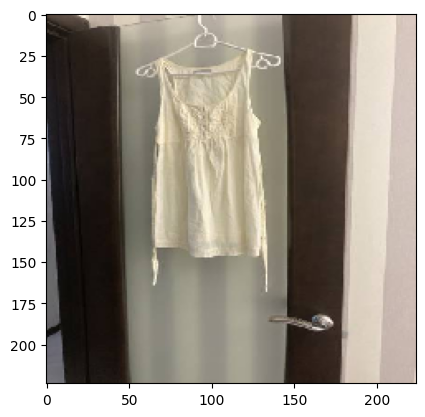

Image loaded successfully!


In [ ]:
original = load_img(r'clothing-dataset-small\train\dress\0a69db60-c052-4b9a-a90d-e53120d091d5.jpg', target_size=(
    imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("Image loaded successfully!")
array_with_image_paths = [
    r'clothing-dataset-small\train\dress\0a69db60-c052-4b9a-a90d-e53120d091d5.jpg',
    r'clothing-dataset-small\train\hat\00d94e21-5891-492e-be0e-792e7338c077.jpg',
    r'clothing-dataset-small\train\dress\0a69db60-c052-4b9a-a90d-e53120d091d5.jpg',
    r'clothing-dataset-small\train\dress\0a69db60-c052-4b9a-a90d-e53120d091d5.jpg',
    r'clothing-dataset-small\train\dress\0a69db60-c052-4b9a-a90d-e53120d091d5.jpg',
    r'clothing-dataset-small\train\dress\0a69db60-c052-4b9a-a90d-e53120d091d5.jpg',
    r'clothing-dataset-small\train\dress\0a69db60-c052-4b9a-a90d-e53120d091d5.jpg',
    r'clothing-dataset-small\train\dress\0a69db60-c052-4b9a-a90d-e53120d091d5.jpg',
    r'clothing-dataset-small\train\dress\0a69db60-c052-4b9a-a90d-e53120d091d5.jpg',
]



In [5]:
importedImages = []
for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)

    importedImages.append(image_batch)

images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())


In [6]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input,
                       outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
numpy_image = img_to_array(original)
# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('Image Batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())


Image Batch size (1, 224, 224, 3)


In [8]:
img_features = feat_extractor.predict(processed_image)

print("Features successfully extracted for one image!")
print("Number of image features:", img_features.size)
img_features


1/1 [==============================] - 2s 2s/step
Features successfully extracted for one image!
Number of image features: 4096


array([[2.9194703, 3.1480966, 0.       , ..., 0.       , 2.2945917,
        2.1676428]], dtype=float32)

In [35]:
imgs_features = feat_extractor.predict(processed_imgs[:160])

print("features successfully extracted!")
imgs_features.shape


5/5 [==============================] - 156s 30s/step
features successfully extracted!


(160, 4096)

In [34]:
cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(
    cosSimilarities, columns=files[:160], index=files[:160])
cos_similarities_df.head()



ValueError: Shape of passed values is (80, 80), indices imply (160, 160)

In [29]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


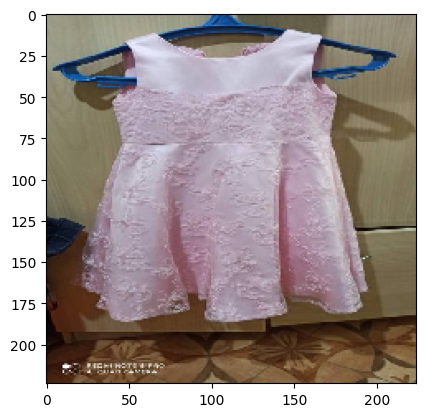

-----------------------------------------------------------------------
most similar products:


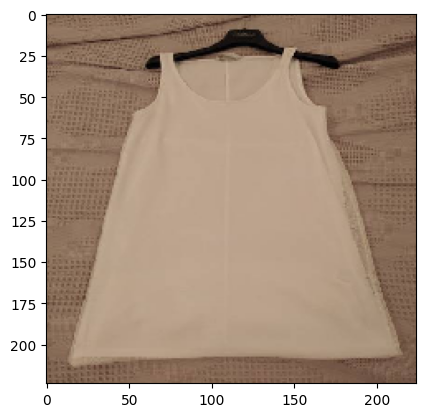

similarity score :  0.5529757


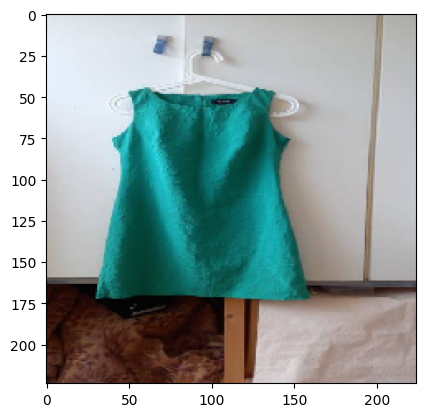

similarity score :  0.53522587


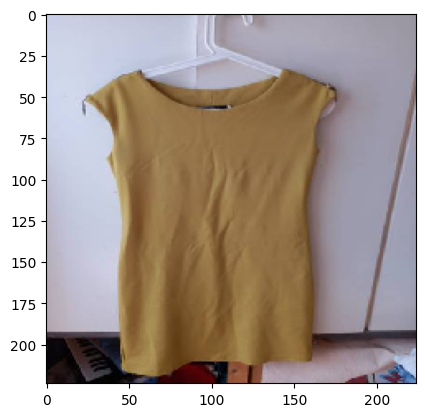

similarity score :  0.5346954


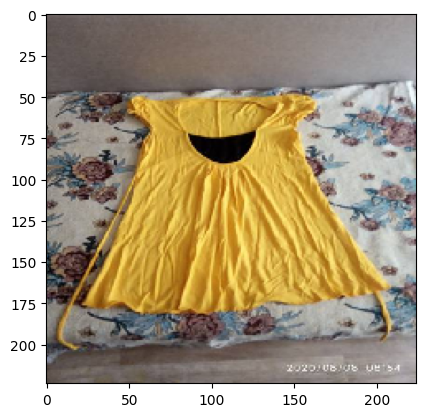

similarity score :  0.49752003


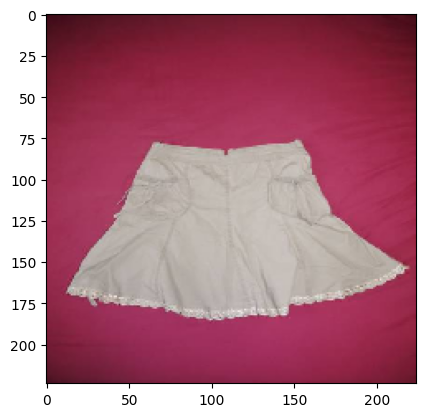

similarity score :  0.48596877


In [32]:
retrieve_most_similar_products(files[4])

In [ ]:
# # confusion matrix
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# matrix_confusion = confusion_matrix(test_label2, predictions.argmax(axis=1))
# #The "argmax" function is used to select the index of the highest value in each row of the predictions array, which corresponds to the predicted class.
# sns.heatmap(matrix_confusion, annot=True)


NameError: name 'predictions' is not defined

In [ ]:
# def plot_image(i, predictions_array, true_label, img):
#   true_label, img = true_label[i], img[i]
#   plt.grid(False)
#   plt.xticks([])
#   plt.yticks([])

#   plt.imshow(img, cmap=plt.cm.binary)

#   predicted_label = np.argmax(predictions_array)
#   if predicted_label == true_label:
#     color = 'blue'
#   else:
#     color = 'red'

#   plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
#                                        100*np.max(predictions_array),
#                                        class_names[true_label]),
#              color=color)


# def plot_value_array(i, predictions_array, true_label):
#   true_label = true_label[i]
#   plt.grid(False)
#   plt.xticks(range(10))
#   plt.yticks([])
#   thisplot = plt.bar(range(10), predictions_array, color="#777777")
#   plt.ylim([0, 1])
#   predicted_label = np.argmax(predictions_array)

#   thisplot[predicted_label].set_color('red')
#   thisplot[true_label].set_color('blue')


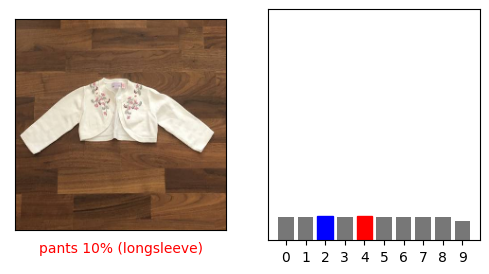

In [ ]:
# i = 66
# plt.figure(figsize=(6, 3))
# plt.subplot(1, 2, 1)
# plot_image(i, predictions[i], test_label2, test_model2)
# plt.subplot(1, 2, 2)
# plot_value_array(i, predictions[i],  test_label2)
# plt.show()
